# minChangeOverview and maxChangeOverview


This notebook introduces the <code>minChangeOverview</code> and <code>maxChangeOverview</code> functions designed to give an idea of the min and max change adversarial attacks on each cell type, on various gene modifications.


## Which attack to choose?

Before generating an attack it is judicious to choose the cell type to attack, and the modification susceptible to lead to a successful attack. Both functions run attack approximations, faster than the original, by studying splices of 100 genes.

## Which classifier is more vulnerable to adversarial attacks?

Sometimes we want to compare two classifiers and see which one is more vulnerable to adversarial attacks.

## Which classifiers?

We study two previously built classifiers:
- RFClassifier based on a random forest model (cf: ADD REF ADD REF ADD REF)
- SVMClassifier based on a SVM model (cf: ADD REF ADD REF ADD REF)

In [1]:
# Libraries
library(randomForest)
library(e1071)
library(Seurat)
library(stringr)
# Notebook plot sizes
options(repr.plot.width=15, repr.plot.height=12)

# adverSCarial library
source("R/adverscarial.r")
# Seurat object
pbmc = readRDS("data/datasets/pbmc.rds")


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Attaching SeuratObject



In [ ]:
# classifier: classifier in rf object
load("classifiers/rf_scrnaseq")

In [2]:
load("classifiers/svm_scrnaseq")

In [5]:
library(IRdisplay)

In [59]:
source("R/adverscarial.r")

In [6]:
rna_matrix = t(as.matrix(pbmc@assays$RNA@counts))
clusters_id = pbmc@meta.data$manual_annotation

# Adapt the classifiers for adverSCarial

In [7]:
RFClassifier = function(expr, clusters, target){
    set.seed(20)
    colnames(expr) = str_replace_all(colnames(expr),"-","_")
    colnames(expr) = str_replace(colnames(expr),"^","g_")
    
    rf_features = names(rf$forest$xlevels)
    c_diff_genes = setdiff(rf_features, colnames(expr))
    expr = as.data.frame(expr)
    expr[,c_diff_genes] = 0
    
    final_predictions <- predict(rf, expr[clusters==target,])
    ratio = as.numeric(sort(table(final_predictions), decreasing = T)[1]) / sum(as.numeric(sort(table(final_predictions), decreasing = T)))
    predicted_class = names(sort(table(final_predictions), decreasing = T)[1])
    if ( ratio < 0.5){
        predicted_class = "NA"
    }
    c(predicted_class, ratio)
}

In [71]:
SVMClassifier = function(expr, clusters, target, seed=20){
    set.seed(seed)
    colnames(expr) = str_replace_all(colnames(expr),"-","_")
    colnames(expr) = str_replace(colnames(expr),"^","g_")
    
    final_predictions <- predict(svmfit, expr[clusters==target,])
    ratio = as.numeric(sort(table(final_predictions), decreasing = T)[1]) / sum(as.numeric(sort(table(final_predictions), decreasing = T)))
    predicted_class = names(sort(table(final_predictions), decreasing = T)[1])
    if ( ratio < 0.3){
        predicted_class = "NA"
    }
    c(predicted_class, ratio)
}

In [8]:
modifications = list()
modifications[[1]] = list("perc1")
modifications[[2]] = list("perc99")

In [64]:
rf_min_change_overview = minChangeOverview(rna_matrix, clusters_id, RFClassifier, modifications= modifications, verbose=T)

Running minChange attack on Memory CD4 T, with a max_split_size of: 100

The smaller the max_split_size, the more precise the result will be, but it will take longer.

Modification: perc1

Warning message in split.default(genes_index, 1:first_dichot):
“data length is not a multiple of split variable”
Split number: 1/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

NA

0.480932203389831

Store gene 1:

c("AL627309.1", "HP1BP3", "MYCBP", "FAM73A", "RP11-343N15.5", "FCRL3", "IPO9", "FH", "CYP1B1", "TMEM150A", "EPC2", "PIKFYVE", "LSM3", "NAT6", "RABL3", "MFN1", "CD38", "AP001816.1", "SLC12A7", "CKMT2-AS1", "GNPDA1", "RP3-380B8.4", "PRRT1", "SMAP1", "LTV1", "HIBADH", "CASD1", "C7orf55-LUC7L2", "DDX3X", "ATG4A", "BMP1", "WWP1", "GS1-393G12.14", "GOLM1", "URM1", "MEIG1", "DLG5", "FAM204A", "C11orf58", "FERMT3", "XRRA1", "ESAM", "ETNK1", "NABP2", "SELPLG", "ZDHHC20", "UPF3A", "DACT1", "SLC25A29", "COPS2", 
"ZSCAN2", "NUDT16L1", "FBXL19", "IST1", "PFN1", "SARM1"

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.622881355932203

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.639830508474576

Split time: 5.77951002120972

Split number: 24/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.627118644067797

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.622881355932203

Split time: 4.92574906349182

Split number: 25/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.622881355932203

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.63771186440678

Split time: 4.96682286262512

Split number: 26/100

Warning message in split.def

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.622881355932203

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.605932203389831

Split time: 5.16873502731323

Split number: 47/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.622881355932203

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.620762711864407

Split time: 4.61881732940674

Split number: 48/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.622881355932203

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.646186440677966

Split time: 4.93267774581909

Split number: 49/100

Warning message in split.de

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.610169491525424

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.605932203389831

Split time: 4.90703010559082

Split number: 70/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.620762711864407

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.622881355932203

Split time: 4.62217569351196

Split number: 71/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.578389830508475

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.620762711864407

Split time: 4.90804481506348

Split number: 72/100

Warning message in split.de

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.627118644067797

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.622881355932203

Split time: 5.16534948348999

Split number: 93/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.622881355932203

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.622881355932203

Split time: 4.94820809364319

Split number: 94/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.620762711864407

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.629237288135593

Split time: 4.64828443527222

Split number: 95/100

Warning message in split.de

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 5.19794654846191

Split number: 20/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 4.9682240486145

Split number: 21/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 4.5538375377655

Split number: 22/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split v

68

create mask

modify data

B

0.950581395348837

Split time: 4.99657154083252

Split number: 44/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 4.98538684844971

Split number: 45/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 4.62196564674377

Split number: 46/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithN

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 4.61260604858398

Split number: 69/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.944767441860465

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 5.27364301681519

Split number: 70/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 5.08717966079712

Split number: 71/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split

68

create mask

modify data

B

0.950581395348837

Split time: 4.96549582481384

Split number: 93/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 5.99982953071594

Split number: 94/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithNewValue 2

68

create mask

modify data

B

0.953488372093023

Split time: 4.96936988830566

Split number: 95/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithN

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 5.14030241966248

Split number: 20/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 4.72112393379211

Split number: 21/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.995833333333333

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 5.17987823486328

Split number: 22/100

Warning message in split.default(unlist

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 4.92948508262634

Split number: 43/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 4.71008515357971

Split number: 44/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.995833333333333

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 5.1043016910553

Split number: 45/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 5.50966739654541

Split number: 66/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 5.13499569892883

Split number: 67/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 13.3200533390045

Split number: 68/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue

modify data

CD14+ Mono

0.997916666666667

Split time: 5.10638833045959

Split number: 89/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 4.92219948768616

Split number: 90/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 4.98431611061096

Split number: 91/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0

create mask

modify data

NK

0.694444444444444

before predictWithNewValue 2

68

create mask

modify data

NK

0.680555555555556

Split time: 4.72704839706421

Split number: 16/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.694444444444444

before predictWithNewValue 2

68

create mask

modify data

NK

0.673611111111111

Split time: 4.67111659049988

Split number: 17/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.701388888888889

before predictWithNewValue 2

68

create mask

modify data

NK

0.694444444444444

Split time: 4.61680865287781

Split number: 18/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWit

modify data

NK

0.708333333333333

Split time: 4.65304160118103

Split number: 40/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.708333333333333

before predictWithNewValue 2

68

create mask

modify data

NK

0.708333333333333

Split time: 4.66134548187256

Split number: 41/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.708333333333333

before predictWithNewValue 2

68

create mask

modify data

NK

0.708333333333333

Split time: 4.65555834770203

Split number: 42/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.708333333333333

before predictWithNewValue 2



genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.680555555555556

before predictWithNewValue 2

68

create mask

modify data

NK

0.708333333333333

Split time: 4.55412912368774

Split number: 65/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.708333333333333

before predictWithNewValue 2

68

create mask

modify data

NK

0.708333333333333

Split time: 4.62822556495667

Split number: 66/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.708333333333333

before predictWithNewValue 2

68

create mask

modify data

NK

0.673611111111111

Split time: 4.71946978569031

Split number: 67/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of

68

create mask

modify data

NK

0.708333333333333

Split time: 4.76012444496155

Split number: 89/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.708333333333333

before predictWithNewValue 2

68

create mask

modify data

NK

0.708333333333333

Split time: 4.69790458679199

Split number: 90/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.708333333333333

before predictWithNewValue 2

68

create mask

modify data

NK

0.708333333333333

Split time: 4.35052990913391

Split number: 91/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.708333333333333

before predic

0.60573476702509

Split time: 4.72412252426147

Split number: 16/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.609318996415771

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.60573476702509

Split time: 4.79796552658081

Split number: 17/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.623655913978495

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.609318996415771

Split time: 5.58641529083252

Split number: 18/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.60573476702509

before predictWithNewValue 2

68

c

68

create mask

modify data

CD8 T

0.60573476702509

Split time: 4.79885077476501

Split number: 40/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.60573476702509

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.60573476702509

Split time: 5.08388113975525

Split number: 41/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.60573476702509

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.620071684587814

Split time: 4.91197109222412

Split number: 42/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.60573476702509



CD8 T

0.591397849462366

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.60573476702509

Split time: 4.8567099571228

Split number: 64/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.623655913978495

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.60573476702509

Split time: 4.8081226348877

Split number: 65/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.616487455197133

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.60573476702509

Split time: 4.83448648452759

Split number: 66/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1



genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.623655913978495

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.598566308243728

Split time: 4.86138510704041

Split number: 86/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.60573476702509

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.60573476702509

Split time: 5.04414534568787

Split number: 87/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.616487455197133

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.60573476702509

Split time: 4.84393858909607

Split number: 88/100

Warning message in split.default(unlist(genes), 1:2):
“data length is no

before predictWithNewValue 2

69

create mask

modify data

Naive CD4 T

0.90295358649789

Split time: 7.40757012367249

Split number: 11/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.908579465541491

before predictWithNewValue 2

69

create mask

modify data

Naive CD4 T

0.915611814345992

Split time: 6.02377796173096

Split number: 12/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.908579465541491

before predictWithNewValue 2

69

create mask

modify data

Naive CD4 T

0.911392405063291

Split time: 5.46095728874207

Split number: 13/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.918424753867792

before predictWithNewValue 2

69

create mask

modify data

Naive CD4 T

0.935302390998594

Split time: 5.35623359680176

Split number: 14/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.915611

modify data

Naive CD4 T

0.911392405063291

Split time: 7.98624515533447

Split number: 35/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.911392405063291

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.911392405063291

Split time: 18.159912109375

Split number: 36/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.911392405063291

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.911392405063291

Split time: 7.7062041759491

Split number: 37/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 

modify data

Naive CD4 T

0.908579465541491

Split time: 5.53675079345703

Split number: 58/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.909985935302391

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.911392405063291

Split time: 5.23416900634766

Split number: 59/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.911392405063291

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.908579465541491

Split time: 5.71251797676086

Split number: 60/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD

modify data

Naive CD4 T

0.911392405063291

Split time: 8.04905438423157

Split number: 81/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.915611814345992

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.909985935302391

Split time: 7.1645245552063

Split number: 82/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.909985935302391

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.911392405063291

Split time: 7.71740031242371

Split number: 83/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.808641975308642

before predictWithNewValue 2

69

create mask

modify data

FCGR3A+ Mono

0.790123456790123

Split time: 6.65533757209778

Split number: 4/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.808641975308642

before predictWithNewValue 2

69

create mask

modify data

FCGR3A+ Mono

0.796296296296296

Split time: 5.3153760433197

Split number: 5/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.777777777777778

before predictWithNewValue 2

69

create mask

modify data

FCGR3A+ Mono

0.796296296296296

Split time: 5.92498159408569

Split number: 6/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.796296296296296

before predictWithNewValue 2

69

create mask

modify data

FCGR3A+ Mono

0.802469135802469

Split time: 6.01486706733704

Split number: 7/100

ge

69

create mask

modify data

FCGR3A+ Mono

0.796296296296296

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.796296296296296

Split time: 4.75317215919495

Split number: 30/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.820987654320988

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.790123456790123

Split time: 4.57335686683655

Split number: 31/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.796296296296296

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.814814814814815

Split time: 4.7179229259491

Split number: 32/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.796296296296296

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.796296296296296

Split time: 4.85494709014893

Split number: 53/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.802469135802469

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.802469135802469

Split time: 4.7145733833313

Split number: 54/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.796296296296296

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.783950617283951

Split time: 4.75687026977539

Split number: 55/100

Warning message in split.def

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.790123456790123

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.796296296296296

Split time: 4.68295288085938

Split number: 76/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.746913580246914

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.771604938271605

Split time: 4.64328026771545

Split number: 77/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.796296296296296

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.783950617283951

Split time: 4.77985334396362

Split number: 78/100

Warning message in split.de

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.796296296296296

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.808641975308642

Split time: 5.21457362174988

Split number: 99/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.796296296296296

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.796296296296296

Split time: 5.35280561447144

Split number: 100/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.808641975308642

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.796296296296296

Split time: 4.48564386367798

An approximation gives about 0 genes can cause a

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

DC

0.53125

Split time: 4.53394293785095

Split number: 18/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.5

before predictWithNewValue 2

68

create mask

modify data

DC

0.53125

Split time: 4.86754250526428

Split number: 19/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.53125

Store gene 1:

c("FAM132A", "LUZP1", "SMAP2", "C1orf52", "RP11-315I20.1", "TAGLN2", "ATP2B4", "SMYD3", "AC093609.1", "LINC00152", "PKP4", "CXCR2", "OXNAD1", "VPRBP", "HSPBAP1", "YEATS2", "SMIM20", "TBCK", "CTD-2256P15.4", "LYSMD3", "PPARGC1B", "TMEM170B", "TAP2.1", "IRAK1BP1", "KATNA1", "LSM5", "BUD31", "SSBP1", "USP11", "CXorf56", "R3HCC1", "

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.53125

Store gene 2:

c("AGTRAP", "CCDC28B", "YIPF1", "CD53", "ATP8B2", "SOAT1", "PSEN2", "OST4", "SNRPG", "DDX18", "AC020571.3", "THAP4", "SETD2", "TOMM70A", "SIAH2", "FAM53A", "FAM47E-STBD1.1", "FNIP2", "PIK3R1", "UBE2B", "RMND5B", "RPP21", "PTK7", "MCM9", "EIF2AK1", "LAT2", "ING3", "CLCN4", "UPRT", "FUNDC2", "NSMAF", "RP11-629O1.2", "RNF38", "PSMD5-AS1", "TOR4A", "DDX50", "HPS6", "ZNF195", "PTGDR2", "NDUFV1", "PCSK7", "KLRG1", "RP11-641A6.2", "CRADD", "MPHOSPH9", "COMMD6", "PRPF39", "GPR65", "OIP5", "ARID3B", "ZNF598", 
"SH2B1", "CTD-2012K14.7", "GLOD4", "TNFRSF13B", "PSMD3", "MTMR4", "ACTG1", "RP11-879F14.2", "UQCC1", "AC009005.2", "ZNF699", "KIAA1683", "RYR1", "MAMSTR", "ZNF805", "UQCR10", "SELO")

Split time: 4.46517276763916

Split number: 35/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 13

69

create mask

modify data

DC

0.5625

before predictWithNewValue 2

68

create mask

modify data

DC

0.53125

Split time: 4.47529864311218

Split number: 54/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

DC

0.5

Split time: 4.56413197517395

Split number: 55/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

DC

0.53125

Split time: 4.44875025749207

Split number: 56/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

befor

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.5625

Store gene 1:

c("DFFB", "AIM1L", "BTBD19", "AGL", "MCL1", "PBX1", "INTS7", "RRM2", "VRK2", "MITD1", "AC010894.5", "COL4A3", "ACAA1", "SLMAP", "NEK11", "TMEM44-AS1", "OCIAD2", "SCLT1", "CCDC152", "DCP2", "PTTG1", "HFE", "RPL10A", "TSTD3", "RPS6KA2", "PURB", "AP1S1", "CDK5", "IQSEC2", "FHL1", "RAB11FIP1", "DCAF13", "TUSC1", "NR4A3", "SURF4", "ZNF33B", "SORBS1", "PSMD13", "PEX16", "AP5B1", "MAML2", "CCND2", "HDAC7", "DYRK2", "WSB2", "CCDC122", "RNF31", "PSEN1", "UBE3A", "KIAA0101", "SNRNP25", "ITPRIPL2", "MT1E", 
"RP11-542M13.3", "TP53", "RP11-799D4.4", "UBE2Z", "ZACN", "RP11-53I6.3", "RALGAPA2", "TUBB1", "VMAC", "ZNF333", "C19orf55", "CKM", "LAIR1", "LL22NC03-86G7.1", "RP5-821D11.7", "TRPM2")

before predictWithNewValue 2

68

create mask

modify data

DC

0.53125

Split time: 4.53727245330811

Split number: 71/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a 

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

DC

0.5

Split time: 4.53852868080139

Split number: 88/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

DC

0.53125

Split time: 5.28595376014709

Split number: 89/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

DC

0.53125

Split time: 4.58668327331543

Split number: 90/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1



Split number: 9/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

69

create mask

modify data

Platelet

0.785714285714286

Split time: 4.13038516044617

Split number: 10/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

69

create mask

modify data

Platelet

0.785714285714286

Split time: 4.78839468955994

Split number: 11/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.857142857142857

before predictWithNewValue 2

69

create mask

modify data

Platelet

0.785714285714286

Split time: 5.78196048736572

Split number: 12/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

69

create mask

modify data

Platelet

0.785714285714286

Split time: 4.56567192077637

Split number:

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.38704967498779

Split number: 35/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.714285714285714

Split time: 4.51432299613953

Split number: 36/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.3946168422699

Split number: 37/100

Warning message in split.default(unlist(genes), 1:2)

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.42738938331604

Split number: 58/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.857142857142857

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.55727219581604

Split number: 59/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.68848967552185

Split number: 60/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platel

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.7196888923645

Split number: 82/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.55084156990051

Split number: 83/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.44741582870483

Split number: 84/100

Warning message in split.default(unlist(genes), 1:2)

0.622881355932203

before predictWithNewValue 2

69

create mask

modify data

Memory CD4 T

0.622881355932203

Split time: 5.80088901519775

Split number: 5/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.625

before predictWithNewValue 2

69

create mask

modify data

Memory CD4 T

0.622881355932203

Split time: 5.05245089530945

Split number: 6/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.63135593220339

before predictWithNewValue 2

69

create mask

modify data

Memory CD4 T

0.648305084745763

Split time: 5.739018201828

Split number: 7/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.620762711864407

before predictWithNewValue 2

69

create mask

modify data

Memory CD4 T

0.644067796610169

Split time: 5.00723481178284

Split number: 8/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T


69

create mask

modify data

Memory CD4 T

0.542372881355932

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.620762711864407

Split time: 4.95815944671631

Split number: 31/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.622881355932203

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.622881355932203

Split time: 4.75699186325073

Split number: 32/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.599576271186441

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.633474576271186

Split time: 5.0401759147644

Split number: 33/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.616525423728814

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.622881355932203

Split time: 5.04107546806335

Split number: 54/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.635593220338983

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.644067796610169

Split time: 10.0728569030762

Split number: 55/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.622881355932203

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.665254237288136

Split time: 5.05257248878479

Split number: 56/100

Warning message in split.de

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.663135593220339

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.625

Split time: 5.06486225128174

Split number: 77/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.625

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.622881355932203

Split time: 22.2420673370361

Split number: 78/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.622881355932203

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.622881355932203

Split time: 6.38339257240295

Split number: 79/100

Warning message in split.default(unlist(genes), 1:2

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.63771186440678

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.622881355932203

Split time: 4.98941826820374

Split number: 100/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

0.608050847457627

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

0.622881355932203

Split time: 5.34060668945312

An approximation gives about 0 genes can cause a one gene min change attack on the Memory CD4 T cell type for the modification perc99

Running minChange attack on B, with a max_split_size of: 100

The smaller the max_split_size, the more precise the result will be, but it will take longer.

Modification: perc99

Warning message in split.default(genes_index, 1:first_dichot):
“data length is not a multiple of split variable

68

create mask

modify data

B

0.953488372093023

Split time: 6.08729553222656

Split number: 27/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithNewValue 2

68

create mask

modify data

B

0.947674418604651

Split time: 5.27181100845337

Split number: 28/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.915697674418605

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 6.07116532325745

Split number: 29/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithN

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.924418604651163

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 15.8088045120239

Split number: 52/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 6.04340696334839

Split number: 53/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 7.46556377410889

Split number: 54/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split

68

create mask

modify data

B

0.950581395348837

Split time: 5.12274384498596

Split number: 76/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.953488372093023

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 5.19570994377136

Split number: 77/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 4.84002637863159

Split number: 78/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithN

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

0.950581395348837

before predictWithNewValue 2

68

create mask

modify data

B

0.950581395348837

Split time: 4.62621855735779

An approximation gives about 0 genes can cause a one gene min change attack on the B cell type for the modification perc99

Running minChange attack on CD14+ Mono, with a max_split_size of: 100

The smaller the max_split_size, the more precise the result will be, but it will take longer.

Modification: perc99

Warning message in split.default(genes_index, 1:first_dichot):
“data length is not a multiple of split variable”
Split number: 1/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.991666666666667

before predictWithNewValue 2

69

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 5.17205309867859

Split number: 2/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.99

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 5.40753126144409

Split number: 27/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.991666666666667

Split time: 5.30235934257507

Split number: 28/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 4.82894682884216

Split number: 29/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple o

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 5.28271985054016

Split number: 50/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.995833333333333

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 5.2569682598114

Split number: 51/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 4.74833726882935

Split number: 52/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify dat

Split number: 73/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.977083333333333

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 5.05957579612732

Split number: 74/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.995833333333333

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.991666666666667

Split time: 5.47244477272034

Split number: 75/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify da

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.99375

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 5.13165688514709

Split number: 97/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 5.08020281791687

Split number: 98/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.997916666666667

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.997916666666667

Split time: 4.96490478515625

Split number: 99/100

Warning message in split.default(unlist(genes), 1

NK

0.708333333333333

before predictWithNewValue 2

68

create mask

modify data

NK

0.680555555555556

Split time: 5.01451468467712

Split number: 24/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.729166666666667

before predictWithNewValue 2

68

create mask

modify data

NK

0.708333333333333

Split time: 4.71693348884583

Split number: 25/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.694444444444444

before predictWithNewValue 2

68

create mask

modify data

NK

0.708333333333333

Split time: 5.12184643745422

Split number: 26/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create ma

0.708333333333333

Split time: 4.68447113037109

Split number: 46/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.708333333333333

before predictWithNewValue 2

68

create mask

modify data

NK

0.645833333333333

Split time: 5.01105737686157

Split number: 47/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.708333333333333

before predictWithNewValue 2

68

create mask

modify data

NK

0.708333333333333

Split time: 4.70992374420166

Split number: 48/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.722222222222222

before predictWithNewValue 2

68

create mask



genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.729166666666667

before predictWithNewValue 2

68

create mask

modify data

NK

0.6875

Split time: 4.76595830917358

Split number: 71/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.708333333333333

before predictWithNewValue 2

68

create mask

modify data

NK

0.6875

Split time: 4.69717288017273

Split number: 72/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.701388888888889

before predictWithNewValue 2

68

create mask

modify data

NK

0.6875

Split time: 5.12683939933777

Split number: 73/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137


modify data

NK

0.6875

Split time: 4.77863788604736

Split number: 95/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.6875

before predictWithNewValue 2

68

create mask

modify data

NK

0.708333333333333

Split time: 4.69553112983704

Split number: 96/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.722222222222222

before predictWithNewValue 2

68

create mask

modify data

NK

0.604166666666667

Split time: 4.7856023311615

Split number: 97/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

0.708333333333333

before predictWithNewValue 2

68

create mask

modify

CD8 T

0.627240143369176

Split time: 4.5900297164917

Split number: 22/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.60573476702509

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.616487455197133

Split time: 5.62971496582031

Split number: 23/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.598566308243728

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.620071684587814

Split time: 12.3197870254517

Split number: 24/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.541218637992832

before predictWithNewValue 

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.609318996415771

Split time: 4.98107719421387

Split number: 46/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.60573476702509

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.541218637992832

Split time: 4.87659788131714

Split number: 47/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.60573476702509

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.60573476702509

Split time: 4.68014621734619

Split number: 48/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify 

69

create mask

modify data

CD8 T

0.623655913978495

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.60573476702509

Split time: 4.99322247505188

Split number: 70/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.602150537634409

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.60573476702509

Split time: 4.88687801361084

Split number: 71/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.630824372759857

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.630824372759857

Split time: 27.9138021469116

Split number: 72/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 13

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.71326164874552

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.623655913978495

Split time: 4.60683560371399

Split number: 94/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.616487455197133

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.53405017921147

Split time: 5.14037418365479

Split number: 95/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.627240143369176

before predictWithNewValue 2

68

create mask

modify data

CD8 T

0.612903225806452

Split time: 6.84694075584412

Split number: 96/100

Warning message in split.default(unlist(genes), 1:2):
“data length is n

modify data

Naive CD4 T

0.911392405063291

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.911392405063291

Split time: 34.2496478557587

Split number: 20/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.911392405063291

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.914205344585091

Split time: 43.9952263832092

Split number: 21/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.912798874824191

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.89732770745429

Split time: 24.5565552711487

Split number: 22/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split vari

create mask

modify data

Naive CD4 T

0.918424753867792

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.911392405063291

Split time: 6.08991742134094

Split number: 43/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.911392405063291

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.908579465541491

Split time: 11.837352514267

Split number: 44/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.908579465541491

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.911392405063291

Split time: 6.04733490943909

Split number: 45/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple 

69

create mask

modify data

Naive CD4 T

0.914205344585091

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.894514767932489

Split time: 5.18690347671509

Split number: 66/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.911392405063291

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.925457102672293

Split time: 5.39100170135498

Split number: 67/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.869198312236287

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.933895921237693

Split time: 4.95939683914185

Split number: 68/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a mult

69

create mask

modify data

Naive CD4 T

0.821378340365682

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.832630098452883

Split time: 5.21708178520203

Split number: 89/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.911392405063291

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.911392405063291

Split time: 5.19118309020996

Split number: 90/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.909985935302391

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.886075949367089

Split time: 4.87226104736328

Split number: 91/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a mult

Split number: 14/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.808641975308642

before predictWithNewValue 2

69

create mask

modify data

FCGR3A+ Mono

0.808641975308642

Split time: 5.46476054191589

Split number: 15/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.827160493827161

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.790123456790123

Split time: 5.03287839889526

Split number: 16/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.790123456790123

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.858024691358025

Split time: 4.91583657264709

Split number: 17/100

Warni

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.820987654320988

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.808641975308642

Split time: 4.53183650970459

Split number: 38/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.820987654320988

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.790123456790123

Split time: 5.01751661300659

Split number: 39/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.808641975308642

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.796296296296296

Split time: 4.53549671173096

Split number: 40/100

Warning message in split.de

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.802469135802469

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.802469135802469

Split time: 4.79275965690613

Split number: 61/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.796296296296296

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.790123456790123

Split time: 4.70218586921692

Split number: 62/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.796296296296296

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.796296296296296

Split time: 4.79702425003052

Split number: 63/100

Warning message in split.de

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.771604938271605

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.820987654320988

Split time: 4.96278309822083

Split number: 84/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.796296296296296

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.814814814814815

Split time: 4.83323264122009

Split number: 85/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

0.808641975308642

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.820987654320988

Split time: 4.63547015190125

Split number: 86/100

Warning message in split.de

modify data

DC

0.53125

Split time: 4.87108373641968

Split number: 8/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

69

create mask

modify data

DC

0.5625

Split time: 4.60659694671631

Split number: 9/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

69

create mask

modify data

DC

0.53125

Split time: 4.24216341972351

Split number: 10/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

DC

0.5625

before predictWithNewValue 2

69

create mask

modify data

CD14+ Mono

0.5625

Store gene 2:

c("RP11-558F24.4", "SNHG12", "NRD1", "SORT1", "S100A8", "DNM3", "CAPN2", "PTRHD1", "WDR92", "AC017002.1", "SLC40A1", "HES6", "ZKSCAN7", "EBLN2", "RP11-271K21.11", "ZNF721", "COX18", "SH3D19", "GAPT", "ACSL6", "TSPAN17", "ZSCAN16-AS1", "MED20", "KIAA1919", "SNX8", "GS1-124K5.4", "DUS4L", "GTPBP6", "SNX12", "TME

Split time: 4.24541807174683

Split number: 27/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.59375

before predictWithNewValue 2

68

create mask

modify data

DC

0.53125

Split time: 4.71722722053528

Split number: 28/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

0.53125

Store gene 1:

c("CCNL2", "RPL11", "CITED4", "LMO4", "RNF115", "SLAMF6", "TMEM81", "RP11-488L18.8", "SLC3A1", "MAL", "TANK", "CTDSP1", "KAT2B", "RPL29", "KALRN", "ECE2", "PGM2", "RPL34", "FAM105B", "TTC37", "NDST1", "NOL7", "HLA-DOA", "TPBG", "SYNE1", "RP11-379H18.1", "ZSCAN25", "EPHA1-AS1", "ZNF81", "NKAP", "BNIP3L", "NDUFAF6", "RFX3", "SUSD3", "IER5L", "OTUD1", "LINC00863", "OAT", "ARL14EP", "ATG2A", "GAB2", "PRDM10", "AC

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.5625

before predictWithNewValue 2

68

create mask

modify data

DC

0.5625

Split time: 4.63868713378906

Split number: 47/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

DC

0.53125

Split time: 4.53061723709106

Split number: 48/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

DC

0.59375

Split time: 4.29663562774658

Split number: 49/100

Warning message in split.default(unlist(genes

DC

0.53125

Split time: 4.31577730178833

Split number: 65/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.5

Store gene 2:

c("RP4-798A10.2", "RP4-728D4.2", "ALG6", "PHTF1", "MSTO1", "TRMT1L", "GNPAT", "WDR43", "DCTN1", "SAP130", "TRAK2", "ARPC4", "RP13-131K19.2", "SLC35A5", "IFT80", "STX18-AS1", "ARHGAP24", "DCTD", "GCNT4", "CTB-43P18.1", "TRIM41", "NFKBIL1", "ENPP5", "VNN2", "AHR", "CD36", "ZC3HC1", "PHKA2", "ARMCX4", "SOX7", "RP11-382J12.1", "GSDMD", "SMC5", "MAPKAP1", "IL15RA", "RP11-442H21.2", "RP11-416N2.4", "TRIM66", "B3GAT3", "IL18BP", "RP11-110I1.14", "LRP6", "HNRNPA1", "GNPTAB", "SFSWAP", "CLYBL", "RP11-463J10.3", 
"TMEM251", "TUBGCP4", "TBC1D2B", "HCFC1R1", "PPP4C", "ZFP90", "RAP1GAP2", "SLC5A10", "RAB5C", "CYB561", "FASN", "RP11-862L9.3", "CTNNBL1", "

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

DC

0.5625

Split time: 4.47573113441467

Split number: 82/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.5

Store gene 2:

c("RP1-43E13.2", "OSCP1", "WLS", "SLC22A15", "BGLAP", "ZBTB41", "RP11-443B7.1", "RASGRP3", "HK2", "RAB3GAP1", "CTLA4", "SEC13", "TCTA", "TIGIT", "GPR160", "TADA2B", "TIGD2", "LRP2BP", "AP3B1", "APBB3", "SERPINB9", "C6orf25", "GCLC", "PERP", "TRA2A", "GTPBP10", "AKR1B1", "ZFX", "TCEAL4", "VPS37A", "IL7", "PLEC", "VPS13A-AS1", "ENG", "DHTKD1", "AGAP5", "BBIP1", "RNF141", "NXF1", "RELT", "GRIK4", "WBP11", "SARNP", "KIAA1033", "ZNF605", "CARKD", "WDHD1", "GLRX5", "B2M", "MESDC2", "ZSCAN32", "SEPHS2", 
"PDPR", "UBE2G1", "DHRS7B", "CTD-3193K9.4", 

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

DC

0.53125

Split time: 4.67252707481384

Split number: 97/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

DC

0.53125

Split time: 4.64244604110718

Split number: 98/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

0.53125

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.5

Store gene 2:

c("PINK1", "UTP11L", "AK5", "RP11-114O18.1", "ARHGEF11", "RPS10P7", "HEATR1", "CDC42EP3", "VAMP8", "ACVR2A", "AC096772.6", "TMEM43", "U73166.2", "FSTL1", "PIK3CA", "FBXL5", "DNAJB1

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.714285714285714

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.62363052368164

Split number: 22/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.571428571428571

Split time: 4.45740628242493

Split number: 23/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.19186162948608

Split number: 24/100

Warning message in split.default(unlist(genes), 1:2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.21343016624451

Split number: 45/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.76464700698853

Split number: 46/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.31398987770081

Split number: 47/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platel

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.760249376297

Split number: 69/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.857142857142857

Split time: 4.38870906829834

Split number: 70/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.56699895858765

Split number: 71/100

Warning message in split.default(unlist(genes), 1:2):

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.61783266067505

Split number: 92/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.785714285714286

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.857142857142857

Split time: 4.6678524017334

Split number: 93/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

0.714285714285714

before predictWithNewValue 2

68

create mask

modify data

Platelet

0.785714285714286

Split time: 4.5383129119873

Split number: 94/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

In [66]:
rf_min_change_overview

perc1 perc99
Memory CD4 T  2     0    
B             0     0    
CD14+ Mono    0     0    
NK            0     1    
CD8 T         1     0    
Naive CD4 T   0     0    
FCGR3A+ Mono  0     0    
DC           21    20    
Platelet      0     0

In [63]:
svm_min_change_overview = minChangeOverview(rna_matrix, clusters_id, SVMClassifier, modifications= modifications, verbose=T)

Running minChange attack on Memory CD4 T, with a max_split_size of: 100

The smaller the max_split_size, the more precise the result will be, but it will take longer.

Modification: perc1

Warning message in split.default(genes_index, 1:first_dichot):
“data length is not a multiple of split variable”
Split number: 1/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

69

create mask

modify data

Memory CD4 T

1

Split time: 29.1898882389069

Split number: 2/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

69

create mask

modify data

Memory CD4 T

1

Split time: 18.4504592418671

Split number: 3/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

69

create mask

modify data

Memory CD4 T

1

Split time: 18.4081146717072

Split number: 4/100

genes size:

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 18.4895668029785

Split number: 30/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 18.4248723983765

Split number: 31/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 18.4481692314148

Split number: 32/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

be

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 18.5637240409851

Split number: 55/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 18.6363925933838

Split number: 56/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 19.0374908447266

Split number: 57/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

be

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 19.0275580883026

Split number: 80/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 19.0069308280945

Split number: 81/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 19.1321883201599

Split number: 82/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

be

69

create mask

modify data

B

1

before predictWithNewValue 2

69

create mask

modify data

B

1

Split time: 15.1610975265503

Split number: 5/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

69

create mask

modify data

B

1

Split time: 15.1436672210693

Split number: 6/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

69

create mask

modify data

B

1

Split time: 15.1963956356049

Split number: 7/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

69

create mask

modify data

B

1

Split time: 15.2161085605621

Split number: 8/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

69

create mask

modify data

B

1

Split time: 15.241482257843

Split number: 9/100

genes size: 138

before predictWithNewValue 1

6

68

create mask

modify data

B

1

Split time: 15.2719779014587

Split number: 35/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 15.2422785758972

Split number: 36/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 15.1628291606903

Split number: 37/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 15.1182060241699

Split number: 38/10

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 15.0335445404053

Split number: 62/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 15.1292564868927

Split number: 63/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 15.2483010292053

Split number: 64/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 15.2566039562225

Split number: 89/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 15.2208507061005

Split number: 90/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 15.2013850212097

Split number: 91/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

mo

CD14+ Mono

1

Split time: 18.2103221416473

Split number: 18/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 18.1582441329956

Split number: 19/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 18.7719609737396

Split number: 20/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 18.4

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 18.360148191452

Split number: 44/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.908333333333333

Split time: 18.2570114135742

Split number: 45/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 18.3255140781403

Split number: 46/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137


68

create mask

modify data

CD14+ Mono

1

Split time: 18.4658579826355

Split number: 69/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 18.3885867595673

Split number: 70/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 18.2515361309052

Split number: 71/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

C

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 18.1648201942444

Split number: 95/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 18.186457157135

Split number: 96/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 18.2575407028198

Split number: 97/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictW

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.3263475894928

Split number: 25/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.3585598468781

Split number: 26/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.3615655899048

Split number: 27/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a mul

68

create mask

modify data

NK

1

Split time: 12.347925901413

Split number: 51/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.2668831348419

Split number: 52/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.2897050380707

Split number: 53/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

0.993055555555556

Split time: 12.34854388237


before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.3948080539703

Split number: 78/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.276887178421

Split number: 79/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.3094770908356

Split number: 80/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predic

CD8 T

1

before predictWithNewValue 2

69

create mask

modify data

CD8 T

1

Split time: 14.7894313335419

Split number: 4/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.989247311827957

before predictWithNewValue 2

69

create mask

modify data

CD8 T

1

Split time: 14.7561254501343

Split number: 5/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

69

create mask

modify data

CD8 T

1

Split time: 14.595360994339

Split number: 6/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

69

create mask

modify data

CD8 T

1

Split time: 14.5383157730103

Split number: 7/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

CD8 T

0.996415770609319

before predictWithNewValue 2

69

create mask

modify data

CD8 T

1

Split time: 14.5366795063019

Split number: 8/100

genes 

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.6222379207611

Split number: 34/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.632491350174

Split number: 35/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.5343284606934

Split number: 36/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.5913262367249

Split number: 60/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.6156721115112

Split number: 61/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.6337254047394

Split number: 62/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNew

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.6607027053833

Split number: 86/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.6581509113312

Split number: 87/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.5901608467102

Split number: 88/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modi

modify data

Naive CD4 T

1

before predictWithNewValue 2

69

create mask

modify data

Naive CD4 T

1

Split time: 21.5577926635742

Split number: 15/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split time: 21.518322467804

Split number: 16/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.9985935302391

Split time: 21.5523335933685

Split number: 17/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data


68

create mask

modify data

Naive CD4 T

0.9985935302391

Split time: 21.5714309215546

Split number: 40/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split time: 21.8013033866882

Split number: 41/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split time: 21.512051820755

Split number: 42/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create m

1

Split time: 21.4528651237488

Split number: 65/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split time: 21.5126476287842

Split number: 66/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.9985935302391

Split time: 21.7077858448029

Split number: 67/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split ti

Split number: 90/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.9985935302391

Split time: 21.6285152435303

Split number: 91/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split time: 21.6358621120453

Split number: 92/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split time: 21.5192844867706

Split numbe

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.0693306922913

Split number: 19/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.0855724811554

Split number: 20/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.0225031375885

Split number: 21/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

be

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.00443816185

Split number: 44/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.91358024691358

Split time: 13.1278927326202

Split number: 45/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.0339665412903

Split number: 46/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes 

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 12.9959528446198

Split number: 69/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 12.9386656284332

Split number: 70/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.0005557537079

Split number: 71/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

be

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.0298566818237

Split number: 94/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.1675429344177

Split number: 95/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.1836094856262

Split number: 96/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithN

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 10.0326175689697

Split number: 24/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 10.2039427757263

Split number: 25/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 10.5498404502869

Split number: 26/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a mul

68

create mask

modify data

DC

1

Split time: 10.3165194988251

Split number: 50/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 10.2723071575165

Split number: 51/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 10.0806863307953

Split number: 52/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 10.4090068340302

Split number

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 10.1922721862793

Split number: 77/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 10.2763900756836

Split number: 78/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 10.3169391155243

Split number: 79/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create m

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

69

create mask

modify data

Platelet

1

Split time: 8.88226461410522

Split number: 3/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

69

create mask

modify data

Platelet

1

Split time: 8.77602529525757

Split number: 4/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

69

create mask

modify data

Platelet

1

Split time: 8.69827389717102

Split number: 5/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

69

create mask

modify data

Platelet

1

Split time: 8.7807240486145

Split number: 6/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

69

create mask

modify data

Platelet

1

Split time: 8.8085618019104



genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.6954300403595

Split number: 33/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.63110017776489

Split number: 34/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.67822480201721

Split number: 35/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.87669086456299

Split number: 59/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.72704362869263

Split number: 60/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.64924097061157

Split number: 61/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.93478512763977

Split number: 85/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.79125785827637

Split number: 86/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 9.14862108230591

Split number: 87/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue

Memory CD4 T

0.997881355932203

Split time: 23.4044890403748

Split number: 9/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

69

create mask

modify data

Memory CD4 T

1

Split time: 22.8639824390411

Split number: 10/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

B

0.783898305084746

Store gene 1:

c("HES4", "RP1-224A6.3", "TRIT1", "RP11-486G15.2", "NBPF9", "PYHIN1", "KDM5B", "ADSS", "MAP4K3", "MRPL35", "FMNL2", "BARD1", "SH3BP5", "XXcos-LUCA11.4", "CCDC58", "DNAJC19", "PACRGL", "SLC9B1", "SRD5A1", "COX7C", "PPP2R2B", "EEF1E1", "HLA-DRA", "MTO1", "SHPRH", "PLEKHA8", "TECPR1", "ADCK2", "ZNF674", "PLS3", "RP11-582J16.5", "C8orf88", "LRRC24", "CKS2", "SET", "TRDMT1", "RP11-773D16.1", "BAG3", "GTF2H1", "GPR137", "WNT11", "STT3A", "TM7SF3", "STAT2", "KCTD10", "MTMR6", "TMEM55B", "TRMT5", "DYNC1H1", 
"SPPL2A", "KLHL25", "FAM86A", "BCKDK", "PSMD7", "ZNF594", "KIAA0100", "TM

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 19.761559009552

Split number: 32/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 19.6312844753265

Split number: 33/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 19.6837341785431

Split number: 34/100

Warning message in s

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 20.6577520370483

Split number: 54/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 28.7932105064392

Split number: 55/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.836864406779661

Store gene 2:

c("FBLIM1", "SMIM12", "FGGY", "CAPZA1", "THBS3", "SMG7", "TAF5L", "SUPT7L", "DUSP11", "PROC", "CLK1", "SRGAP3", "UQCRC1", "TRAT1", "CCNL1", "GRK4", "LIN54", "HMGB2", "TMEM171", "CDC23", "MAPK9", "CCHCR1", "SLC35B2", "SAMD3", "NDUFA4", "CC

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 19.6628713607788

Split number: 77/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 20.1395518779755

Split number: 78/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Memory CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Memory CD4 T

1

Split time: 19.7657675743103

Split number: 79/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

mo

The smaller the max_split_size, the more precise the result will be, but it will take longer.

Modification: perc99

Warning message in split.default(genes_index, 1:first_dichot):
“data length is not a multiple of split variable”
Split number: 1/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

69

create mask

modify data

B

1

Split time: 33.0098860263824

Split number: 2/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

69

create mask

modify data

B

1

Split time: 17.1669623851776

Split number: 3/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

69

create mask

modify data

B

1

Split time: 16.6894743442535

Split number: 4/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

69

create mask

modify data

B

1



B

1

Split time: 16.1527850627899

Split number: 32/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 16.3764593601227

Split number: 33/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 16.6719291210175

Split number: 34/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 16.5841040611267

Split number: 35/100

Warning message in split.de

Split time: 16.3094429969788

Split number: 56/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 16.2283709049225

Split number: 57/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 15.8465609550476

Split number: 58/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 16.1109280586243

Split number: 59/100

Warning message in split.default(

68

create mask

modify data

B

0.834302325581395

Split time: 46.5475568771362

Split number: 83/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 26.3419799804688

Split number: 84/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 33.5919120311737

Split number: 85/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

B

1

before predictWithNewValue 2

68

create mask

modify data

B

1

Split time: 17.7299337387085

Spl

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

69

create mask

modify data

CD14+ Mono

1

Split time: 30.8172428607941

Split number: 12/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

69

create mask

modify data

CD14+ Mono

1

Split time: 20.0127966403961

Split number: 13/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

69

create mask

modify data

CD14+ Mono

1

Split time: 19.7209515571594

Split number: 14/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

69

create mask

modify data

CD14+ Mono

1

Split time: 19.6229228973389

Split number: 15/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

bef

68

create mask

modify data

CD14+ Mono

1

Split time: 39.2524750232697

Split number: 38/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 33.8159296512604

Split number: 39/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 37.6956307888031

Split number: 40/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

C

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 31.8681058883667

Split number: 64/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 31.7863621711731

Split number: 65/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 31.2975897789001

Split number: 66/100

Warning message in split.defaul

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 30.8487391471863

Split number: 89/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 31.5409235954285

Split number: 90/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD14+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

1

Split time: 31.9276022911072

Split number: 91/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

6

modify data

NK

1

Split time: 12.3350613117218

Split number: 18/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.1958222389221

Split number: 19/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.1768641471863

Split number: 20/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.3067669868469

Split number: 21/100

Warning

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.5543384552002

Split number: 43/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.6329550743103

Split number: 44/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.944444444444444

Store gene 2:

c("VPS13D", "ZBTB8OS", "PARS2", "OVGP1", "SHC1", "RP11-46A10.5", "C1orf145", "AC074117.10", "DYSF", "EPB41L5", "MARS2", "RP11-97C16.1", "MAP4", "NXPE3", "C3orf33", "HAUS3", "ANTXR2", "MSMO1", "S

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.4006171226501

Split number: 65/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.2360653877258

Split number: 66/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

0.993055555555556

Split time: 12.157940864563

Split number: 67/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask



Split number: 91/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.5659601688385

Split number: 92/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.5801041126251

Split number: 93/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

NK

1

before predictWithNewValue 2

68

create mask

modify data

NK

1

Split time: 12.4404966831207

Split number: 94/100

Warning message in split.default(unlist(genes), 1:2):
“da

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.8159475326538

Split number: 21/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.9033966064453

Split number: 22/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.8276948928833

Split number: 23/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

crea

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.903225806451613

Store gene 2:

c("VPS13D", "ZBTB8OS", "PARS2", "OVGP1", "SHC1", "RP11-46A10.5", "C1orf145", "AC074117.10", "DYSF", "EPB41L5", "MARS2", "RP11-97C16.1", "MAP4", "NXPE3", "C3orf33", "HAUS3", "ANTXR2", "MSMO1", "SMN2", "PCBD2", "RUFY1", "PPP1R18", "XPO5", "NCOA7", "RP11-611L7.1", "HIP1", "GCC1", "TRAPPC2", "P2RY10", "FBXO25", "YTHDF3-AS1", "RP11-809O17.1", "TRMT10B", "RBM18", "EHMT1", "C10orf35", "C10orf95", "TRIM22", "TMEM138", "SUV420H1", "MPZL3", "CLEC2B", "ZNF740", "SNRPF", "TMED2", "RNF219", "RP11-649E7.5", "PSMC1", 
"RP11-23P13.7", "RPP25", "E4F1", "SNX29P2", "THAP11", "SLC43A2", "SMCR5", "CTD-2267D19.2", "YPEL2", "SLC25A10.1", "SERPINB2", "RBM39", "MED16", "UBL5", "AC005253.2", "SIRT2", "FTL", "ZNF749", "RP4-539M6.22", "SCO2")

Split time: 14.9540433883667

Split number: 45/100

Warning message in split.default(unlist(gene

Split number: 66/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.9141175746918

Split number: 67/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.8205380439758

Split number: 68/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.9724826812744

Split number: 69/100

Warning message in split.default(unlist

Split time: 14.8677799701691

Split number: 91/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.8557591438293

Split number: 92/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.8365106582642

Split number: 93/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

CD8 T

1

before predictWithNewValue 2

68

create mask

modify data

CD8 T

1

Split time: 14.8244659900665

Split number: 94/100

Warning m

Split time: 22.0153558254242

Split number: 14/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

69

create mask

modify data

Naive CD4 T

1

Split time: 22.1040012836456

Split number: 15/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split time: 22.4281039237976

Split number: 16/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.9985935302391

Split time: 22.0512263774872

Split number: 17/100

Warning message in split.default(unlist(genes), 1:2):
“data len

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split time: 22.0573856830597

Split number: 36/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split time: 22.3001174926758

Split number: 37/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.9985935302391

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.9985935302391

Split time: 22.1610736846924

Split number: 38/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variabl

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split time: 22.080806016922

Split number: 57/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split time: 22.2288253307343

Split number: 58/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split time: 22.7950718402863

Split number: 59/100

Warning message in split.d

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split time: 22.3384692668915

Split number: 82/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

0.870604781997187

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

0.9971870604782

Split time: 22.5021312236786

Split number: 83/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Naive CD4 T

1

before predictWithNewValue 2

68

create mask

modify data

Naive CD4 T

1

Split time: 22.1945776939392

Split number: 84/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split varia

Split number: 7/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

69

create mask

modify data

FCGR3A+ Mono

1

Split time: 14.7524490356445

Split number: 8/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

69

create mask

modify data

CD14+ Mono

0.518518518518518

Store gene 2:

c("PIK3CD", "RCC1", "EPS15", "CELSR2", "S100A9", "VAMP4", "SUSD4", "ITSN2", "ETAA1", "MIR4435-1HG", "CALCRL", "ILKAP", "ZNF445", "SHQ1", "RNF7", "ZNF718", "DCK", "LRBA", "GPBP1", "RAPGEF6", "FAF2", "RP1-313I6.12", "PRICKLE4", "RPF2", "FTSJ2", "LINC00174", "HBP1", "VIPR2", "PDZD11", "HCFC1", "HGSNAT", "TRMT12", "RP11-195F19.9", "SLC46A2", "MAMDC4", "CSTF2T", "DNMBP", "AP2A2", "YPEL4", "RBM4B", "C11orf1", "U47924.31", "COX14", "ZDHHC17", "RHOF", "TRIM13", "SPTSSA", "C14orf1", "EIF2AK4", "GLCE", "BAIAP3", 
"PRKCB", "DYNC1LI2", "SPG7", "TMEM220", "CTB-58E

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.1662120819092

Split number: 33/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.0769643783569

Split number: 34/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.2117741107941

Split number: 35/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

be

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.5462930202484

Split number: 58/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.2546951770782

Split number: 59/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

FCGR3A+ Mono

1

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

1

Split time: 13.296055316925

Split number: 60/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNe

69

create mask

modify data

CD14+ Mono

0.716049382716049

Store gene 1:

c("PLEKHG5", "TRNP1", "NASP", "DPH5", "MLLT11", "RP11-104L21.3", "ANGEL2", "TRIB2", "XPO1", "CNOT11", "TTC30A", "CAB39", "RPSA", "FHIT", "RAB6B", "TFRC", "EXOC1", "RP11-425I13.3", "PAIP1", "CTD-2287O16.5", "CTB-114C7.4", "HIST1H2BH", "PPIL1", "PDSS2", "DLL1", "IKZF1", "POLR2J", "PRKAG2", "PAGE5", "CXorf40A", "TACC1", "UTP23", "APTX", "NIPSNAP3B", "OLFM1", "RASSF4", "RP11-175O19.4", "RP13-317D12.3", "ARFGAP2", "BANF1", "CASP4", "VAMP1", "RND1", "LYZ", "SIRT4", "SPERT", "RABGGTA", "COQ6", "OTUD7A", 
"PARP16", "RAB11FIP3", "LYRM1", "PLLP", "BANP", "PER1", "TAF15", "PDK2", "ST6GALNAC2", "C18orf21", "ACSS1", "LSM14B", "CRB3", "TPM4", "TBCB", "SNRPD2", "FCAR", "C22orf15", "NFAM1", "SLC19A1")

before predictWithNewValue 2

68

create mask

modify data

FCGR3A+ Mono

0.987654320987654

Split time: 13.0755851268768

Split number: 83/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multipl

Split number: 6/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

69

create mask

modify data

DC

1

Split time: 10.7248630523682

Split number: 7/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

69

create mask

modify data

DC

1

Split time: 9.8489625453949

Split number: 8/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

69

create mask

modify data

DC

1

Split time: 10.9442155361176

Split number: 9/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

69

create mask

modify data

DC

1

Split time: 10.441638469696

Split number: 10/100

genes size: 138

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

69

create mask

modify data

DC

1

Split time: 9.8771550

68

create mask

modify data

DC

1

Split time: 10.163712978363

Split number: 36/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 9.92428541183472

Split number: 37/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 9.80942845344543

Split number: 38/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 10.1213824748993

Split number:

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 9.68572068214417

Split number: 61/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 10.2454891204834

Split number: 62/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 10.102343082428

Split number: 63/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a mult

68

create mask

modify data

DC

1

Split time: 10.1078169345856

Split number: 87/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 9.52194881439209

Split number: 88/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 9.81998801231384

Split number: 89/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

DC

1

before predictWithNewValue 2

68

create mask

modify data

DC

1

Split time: 9.81980729103088

Split number

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.8343243598938

Split number: 17/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.7309582233429

Split number: 18/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.61691832542419

Split number: 19/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 9.02317309379578

Split number: 43/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.6513569355011

Split number: 44/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

CD14+ Mono

0.571428571428571

Store gene 2:

c("VPS13D", "ZBTB8OS", "PARS2", "OVGP1", "SHC1", "RP11-46A10.5", "C1orf145", "AC074117.10", "DYSF", "EPB41L5", "MARS2", "RP11-97C16.1", "MAP4", "NXPE3", "C3orf33", "HA

genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.66766548156738

Split number: 62/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.57680058479309

Split number: 63/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.78623294830322

Split number: 64/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue

Split number: 85/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.52594089508057

Split number: 86/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.77439737319946

Split number: 87/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

before predictWithNewValue 1

69

create mask

modify data

Platelet

1

before predictWithNewValue 2

68

create mask

modify data

Platelet

1

Split time: 8.32304263114929

Split number: 88/100

Warning message in sp

In [65]:
svm_min_change_overview

perc1 perc99
Memory CD4 T 0     5     
B            0     2     
CD14+ Mono   0     0     
NK           0     3     
CD8 T        0     4     
Naive CD4 T  0     7     
FCGR3A+ Mono 0     2     
DC           0     1     
Platelet     0     3

In [68]:
rf_max_change_overview = maxChangeOverview(rna_matrix, clusters_id, RFClassifier, modifications= modifications, verbose=T)

Running maxChange attack on Memory CD4 T, with a max_split_size of: 100

The smaller the max_split_size, the more precise the result will be, but it will take longer.

Modification: perc1

genes size: 13714

current gene results length: 0

before predictWithNewValue 1

6857

create mask

modify data

Naive CD4 T

0.616525423728814

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 6857

current gene results length: 0

before predictWithNewValue 1

3428

create mask

modify data

Naive CD4 T

0.552966101694915

NOT same cell_type 1

genes size: 3428

current gene results length: 0

before predictWithNewValue 1

1714

create mask

modify data

Naive CD4 T

0.527542372881356

NOT same cell_type 1

genes size: 1714

current gene results length: 0

before predictWithNewValue 1

857

create mask

modify data

Memory CD4 T

0.567796610169492

same cell_type 1

1 length(l_results) == 0: 857

before predictW

modify data

Memory CD4 T

0.627118644067797

same cell_type 1

check if concat lists still gives target

length of tested gene list: 3748

create mask

modify data

YES: merge results

1 results length after merge: 3748

before predictWithNewValue 2

429

create mask

modify data

Memory CD4 T

0.569915254237288

same cell_type 2

check if concat lists still gives target

length of tested gene list: 4177

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 3748

before predictWithNewValue 1

214

create mask

modify data

Memory CD4 T

0.627118644067797

same cell_type 1

check if concat lists still gives target

length of tested gene list: 3962

create mask

modify data

YES: merge results

1 results length after merge: 3962

before predictWithNewValue 2

215

create mask

modify data

Memory CD4 T

0.565677966101695

same cell_type 2

check

length of tested gene list: 8248

create mask

modify data

YES: merge results

1 results length after merge: 8248

before predictWithNewValue 2

108

create mask

modify data

Memory CD4 T

0.584745762711864

same cell_type 2

check if concat lists still gives target

length of tested gene list: 8356

create mask

modify data

NO: split and retry

genes size: 108

current gene results length: 8248

before predictWithNewValue 1

54

create mask

modify data

Memory CD4 T

0.622881355932203

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8302

create mask

modify data

YES: merge results

1 results length after merge: 8302

before predictWithNewValue 2

54

create mask

modify data

Memory CD4 T

0.584745762711864

same cell_type 2

check if concat lists still gives target

length of tested gene list: 8356

create mask

modify data

NO: split and retry

before predictWithNewValue 2

1714

create mask

modify data

Naive CD4 T

0.531779661016949



genes size: 1715

current gene results length: 11622

before predictWithNewValue 1

857

create mask

modify data

Memory CD4 T

0.584745762711864

same cell_type 1

check if concat lists still gives target

length of tested gene list: 12479

create mask

modify data

YES: merge results

1 results length after merge: 12479

before predictWithNewValue 2

858

create mask

modify data

Naive CD4 T

0.633474576271186

NOT same cell_type 2

genes size: 858

current gene results length: 12479

before predictWithNewValue 1

429

create mask

modify data

Naive CD4 T

0.625

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 12479

before predictWithNewValue 1

214

create mask

modify data

Memory CD4 T

0.599576271186441

same cell_type 1

check if concat lists still gives target

length of tested gene list: 12693

create mask

modify data

YES: merge results

1 results l

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 6857

current gene results length: 6857

before predictWithNewValue 1

3428

create mask

modify data

CD14+ Mono

0.983333333333333

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10285

create mask

modify data

NO: split and retry

genes size: 3428

current gene results length: 6857

before predictWithNewValue 1

1714

create mask

modify data

CD14+ Mono

0.997916666666667

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8571

create mask

modify data

YES: merge results

1 results length after merge: 8571

before predictWithNewValue 2

1714

create mask

modify data

CD14+ Mono

0.99375

same cell_type 2

check if concat lists still gives target

length of tested gene list: 10285

create mask

modify data

NO: split and retry

genes size: 17

before predictWithNewValue 2

429

create mask

modify data

CD14+ Mono

0.989583333333333

same cell_type 2

check if concat lists still gives target

length of tested gene list: 10982

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 10553

before predictWithNewValue 1

214

create mask

modify data

CD14+ Mono

0.991666666666667

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10767

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 10553

before predictWithNewValue 1

107

create mask

modify data

CD14+ Mono

0.997916666666667

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10660

create mask

modify data

YES: merge results

1 results length after merge: 10660

before predictWithNewValue 2

107

create mask

modi

Running maxChange attack on NK, with a max_split_size of: 100

The smaller the max_split_size, the more precise the result will be, but it will take longer.

Modification: perc1

genes size: 13714

current gene results length: 0

before predictWithNewValue 1

6857

create mask

modify data

NA

0.472222222222222

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 6857

current gene results length: 0

before predictWithNewValue 1

3428

create mask

modify data

NA

0.395833333333333

NOT same cell_type 1

genes size: 3428

current gene results length: 0

before predictWithNewValue 1

1714

create mask

modify data

NA

0.479166666666667

NOT same cell_type 1

genes size: 1714

current gene results length: 0

before predictWithNewValue 1

857

create mask

modify data

NK

0.618055555555556

same cell_type 1

1 length(l_results) == 0: 857

before predictWithNewValue 2

857

create mask

modify data

N

214

create mask

modify data

NK

0.673611111111111

same cell_type 1

check if concat lists still gives target

length of tested gene list: 4819

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 4605

before predictWithNewValue 1

107

create mask

modify data

NK

0.6875

same cell_type 1

check if concat lists still gives target

length of tested gene list: 4712

create mask

modify data

YES: merge results

1 results length after merge: 4712

before predictWithNewValue 2

107

create mask

modify data

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

length of tested gene list: 4819

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 4712

before predictWithNewValue 1

53

create mask

modify data

NK

0.708333333333333

same cell_type 1

check if concat lists 

2 results length after merge: 5838

before predictWithNewValue 2

215

create mask

modify data

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6053

create mask

modify data

YES: merge results

2 results length after merge: 6053

before predictWithNewValue 2

429

create mask

modify data

NK

0.652777777777778

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6482

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 6053

before predictWithNewValue 1

214

create mask

modify data

NK

0.680555555555556

same cell_type 1

check if concat lists still gives target

length of tested gene list: 6267

create mask

modify data

YES: merge results

1 results length after merge: 6267

before predictWithNewValue 2

215

create mask

modify data

NK

before predictWithNewValue 2

858

create mask

modify data

NK

0.541666666666667

same cell_type 2

check if concat lists still gives target

length of tested gene list: 13124

create mask

modify data

NO: split and retry

genes size: 858

current gene results length: 12266

before predictWithNewValue 1

429

create mask

modify data

NK

0.722222222222222

same cell_type 1

check if concat lists still gives target

length of tested gene list: 12695

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 12266

before predictWithNewValue 1

214

create mask

modify data

NK

0.6875

same cell_type 1

check if concat lists still gives target

length of tested gene list: 12480

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 12266

before predictWithNewValue 1

107

create mask

modify data

NK

0.694

check if concat lists still gives target

length of tested gene list: 3320

create mask

modify data

YES: merge results

2 results length after merge: 3320

before predictWithNewValue 2

3429

create mask

modify data

CD8 T

0.609318996415771

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6749

create mask

modify data

YES: merge results

2 results length after merge: 6749

before predictWithNewValue 2

6857

create mask

modify data

Naive CD4 T

0.512544802867383

NOT same cell_type 2

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 6857

current gene results length: 6749

before predictWithNewValue 1

3428

create mask

modify data

CD8 T

0.612903225806452

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10177

create mask

modify data

YES: merge results

1 results length after merge: 10177

before predictWithNewValue 2

3429

cre

length of tested gene list: 12856

create mask

modify data

NO: split and retry

before predictWithNewValue 2

215

create mask

modify data

CD8 T

0.594982078853047

same cell_type 2

check if concat lists still gives target

length of tested gene list: 13017

create mask

modify data

YES: merge results

2 results length after merge: 13017

before predictWithNewValue 2

429

create mask

modify data

CD8 T

0.609318996415771

same cell_type 2

check if concat lists still gives target

length of tested gene list: 13446

create mask

modify data

YES: merge results

2 results length after merge: 13446

At least 13446 genes can be modified with the perc1 method, and the cluster will still be classified as CD8 T

Running maxChange attack on Naive CD4 T, with a max_split_size of: 100

The smaller the max_split_size, the more precise the result will be, but it will take longer.

Modification: perc1

genes size: 13714

current gene results length: 0

before predictWithNewValue 1

6857

cr

current gene results length: 2571

before predictWithNewValue 1

107

create mask

modify data

FCGR3A+ Mono

0.746913580246914

same cell_type 1

check if concat lists still gives target

length of tested gene list: 2678

create mask

modify data

YES: merge results

1 results length after merge: 2678

before predictWithNewValue 2

107

create mask

modify data

FCGR3A+ Mono

0.790123456790123

same cell_type 2

check if concat lists still gives target

length of tested gene list: 2785

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 2678

before predictWithNewValue 1

53

create mask

modify data

FCGR3A+ Mono

0.796296296296296

same cell_type 1

check if concat lists still gives target

length of tested gene list: 2731

create mask

modify data

YES: merge results

1 results length after merge: 2731

before predictWithNewValue 2

54

c

create mask

modify data

NO: split and retry

before predictWithNewValue 2

429

create mask

modify data

FCGR3A+ Mono

0.759259259259259

same cell_type 2

check if concat lists still gives target

length of tested gene list: 5838

create mask

modify data

YES: merge results

2 results length after merge: 5838

before predictWithNewValue 2

858

create mask

modify data

FCGR3A+ Mono

0.703703703703704

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6696

create mask

modify data

NO: split and retry

genes size: 858

current gene results length: 5838

before predictWithNewValue 1

429

create mask

modify data

FCGR3A+ Mono

0.765432098765432

same cell_type 1

check if concat lists still gives target

length of tested gene list: 6267

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 5838

befor

same cell_type 1

check if concat lists still gives target

length of tested gene list: 7712

create mask

modify data

YES: merge results

1 results length after merge: 7712

before predictWithNewValue 2

54

create mask

modify data

FCGR3A+ Mono

0.790123456790123

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7766

create mask

modify data

NO: split and retry

before predictWithNewValue 2

107

create mask

modify data

FCGR3A+ Mono

0.796296296296296

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7819

create mask

modify data

YES: merge results

2 results length after merge: 7819

before predictWithNewValue 2

429

create mask

modify data

FCGR3A+ Mono

0.771604938271605

same cell_type 2

check if concat lists still gives target

length of tested gene list: 8248

create mask

modify data

YES: merge results

2 results length after merge: 8248

before predictWithNewValue 2

1714

create mask

m

check if concat lists still gives target

length of tested gene list: 9586

create mask

modify data

YES: merge results

2 results length after merge: 9586

before predictWithNewValue 2

215

create mask

modify data

FCGR3A+ Mono

0.814814814814815

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9801

create mask

modify data

YES: merge results

2 results length after merge: 9801

before predictWithNewValue 2

3429

create mask

modify data

CD14+ Mono

0.777777777777778

NOT same cell_type 2

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 3429

current gene results length: 9801

before predictWithNewValue 1

1714

create mask

modify data

FCGR3A+ Mono

0.709876543209877

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11515

create mask

modify data

NO: split and retry

genes size: 1714

current gene results length: 9801

before pre

genes size: 214

current gene results length: 12212

before predictWithNewValue 1

107

create mask

modify data

FCGR3A+ Mono

0.783950617283951

same cell_type 1

check if concat lists still gives target

length of tested gene list: 12319

create mask

modify data

YES: merge results

1 results length after merge: 12319

before predictWithNewValue 2

107

create mask

modify data

FCGR3A+ Mono

0.623456790123457

same cell_type 2

check if concat lists still gives target

length of tested gene list: 12426

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 12319

before predictWithNewValue 1

53

create mask

modify data

FCGR3A+ Mono

0.796296296296296

same cell_type 1

check if concat lists still gives target

length of tested gene list: 12372

create mask

modify data

YES: merge results

1 results length after merge: 12372

before pred

check if concat lists still gives target

length of tested gene list: 2356

create mask

modify data

YES: merge results

2 results length after merge: 2356

before predictWithNewValue 2

857

create mask

modify data

NA

0.4375

NOT same cell_type 2

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 2356

before predictWithNewValue 1

428

create mask

modify data

NA

0.4375

NOT same cell_type 1

genes size: 428

current gene results length: 2356

before predictWithNewValue 1

214

create mask

modify data

DC

0.5625

same cell_type 1

check if concat lists still gives target

length of tested gene list: 2570

create mask

modify data

YES: merge results

1 results length after merge: 2570

before predictWithNewValue 2

214

create mask

modify data

DC

0.5

same cell_type 2

check if concat lists still gives target

length of tested gene list: 2784

create mask

modify data

NO: s

1 results length after merge: 3854

before predictWithNewValue 2

54

create mask

modify data

CD14+ Mono

0.5625

NOT same cell_type 2

before predictWithNewValue 2

107

create mask

modify data

DC

0.5

same cell_type 2

check if concat lists still gives target

length of tested gene list: 3961

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 3854

before predictWithNewValue 1

53

create mask

modify data

DC

0.5

same cell_type 1

check if concat lists still gives target

length of tested gene list: 3907

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

DC

0.53125

same cell_type 2

check if concat lists still gives target

length of tested gene list: 3908

create mask

modify data

YES: merge results

2 results length after merge: 3908

before predictWithNewValue 2

214

c

create mask

modify data

YES: merge results

2 results length after merge: 4818

before predictWithNewValue 2

107

create mask

modify data

DC

0.5

same cell_type 2

check if concat lists still gives target

length of tested gene list: 4925

create mask

modify data

YES: merge results

2 results length after merge: 4925

before predictWithNewValue 2

215

create mask

modify data

DC

0.5

same cell_type 2

check if concat lists still gives target

length of tested gene list: 5140

create mask

modify data

YES: merge results

2 results length after merge: 5140

before predictWithNewValue 2

858

create mask

modify data

CD14+ Mono

0.53125

NOT same cell_type 2

genes size: 858

current gene results length: 5140

before predictWithNewValue 1

429

create mask

modify data

DC

0.53125

same cell_type 1

check if concat lists still gives target

length of tested gene list: 5569

create mask

modify data

YES: merge results

1 results length after merge: 5569

before predictWithNe

before predictWithNewValue 1

54

create mask

modify data

DC

0.53125

same cell_type 1

check if concat lists still gives target

length of tested gene list: 7444

create mask

modify data

YES: merge results

1 results length after merge: 7444

before predictWithNewValue 2

54

create mask

modify data

CD14+ Mono

0.5

NOT same cell_type 2

before predictWithNewValue 2

1714

create mask

modify data

NA

0.46875

NOT same cell_type 2

genes size: 1714

current gene results length: 7444

before predictWithNewValue 1

857

create mask

modify data

CD14+ Mono

0.5

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 7444

before predictWithNewValue 1

428

create mask

modify data

DC

0.5

same cell_type 1

check if concat lists still gives target

length of tested gene list: 7872

create mask

modify data

YES: merge results

1 results length after merge: 7872



genes size: 107

current gene results length: 10926

before predictWithNewValue 1

53

create mask

modify data

DC

0.53125

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10979

create mask

modify data

YES: merge results

1 results length after merge: 10979

before predictWithNewValue 2

54

create mask

modify data

DC

0.53125

same cell_type 2

check if concat lists still gives target

length of tested gene list: 11033

create mask

modify data

NO: split and retry

before predictWithNewValue 2

214

create mask

modify data

DC

0.53125

same cell_type 2

check if concat lists still gives target

length of tested gene list: 11193

create mask

modify data

YES: merge results

2 results length after merge: 11193

before predictWithNewValue 2

429

create mask

modify data

CD14+ Mono

0.5625

NOT same cell_type 2

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

curre

before predictWithNewValue 1

214

create mask

modify data

NA

0.46875

NOT same cell_type 1

genes size: 214

current gene results length: 11674

before predictWithNewValue 1

107

create mask

modify data

NA

0.46875

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 11674

before predictWithNewValue 1

53

create mask

modify data

NA

0.46875

NOT same cell_type 1

before predictWithNewValue 2

54

create mask

modify data

DC

0.53125

same cell_type 2

check if concat lists still gives target

length of tested gene list: 11728

create mask

modify data

YES: merge results

2 results length after merge: 11728

before predictWithNewValue 2

107

create mask

modify data

DC

0.53125

same cell_type 2

check if concat lists still gives target

length of tested gene list: 11835

create mask

modify data

YES: merge results

2 results length after merge: 11835



before predictWithNewValue 1

107

create mask

modify data

Platelet

0.714285714285714

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11623

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 11516

before predictWithNewValue 1

53

create mask

modify data

Platelet

0.785714285714286

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11569

create mask

modify data

YES: merge results

1 results length after merge: 11569

before predictWithNewValue 2

54

create mask

modify data

Platelet

0.714285714285714

same cell_type 2

check if concat lists still gives target

length of tested gene list: 11623

create mask

modify data

NO: split and retry

before predictWithNewValue 2

107

create mask

modify data

Platelet

0.785714285714286

same cell_type 2

check

check if concat lists still gives target

length of tested gene list: 4285

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 3428

before predictWithNewValue 1

428

create mask

modify data

Memory CD4 T

0.625

same cell_type 1

check if concat lists still gives target

length of tested gene list: 3856

create mask

modify data

YES: merge results

1 results length after merge: 3856

before predictWithNewValue 2

429

create mask

modify data

Memory CD4 T

0.565677966101695

same cell_type 2

check if concat lists still gives target

length of tested gene list: 4285

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 3856

before predictWithNewValue 1

214

create mask

modify data

Memory CD4 

create mask

modify data

YES: merge results

2 results length after merge: 6695

before predictWithNewValue 2

6857

create mask

modify data

Memory CD4 T

0.622881355932203

same cell_type 2

check if concat lists still gives target

length of tested gene list: 13552

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 6857

current gene results length: 6695

before predictWithNewValue 1

3428

create mask

modify data

Memory CD4 T

0.699152542372881

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10123

create mask

modify data

NO: split and retry

genes size: 3428

current gene results length: 6695

before predictWithNewValue 1

1714

create mask

modify data

Memory CD4 T

0.669491525423729

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8409

create mask

modify data

NO: split and retry

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9586

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 9372

before predictWithNewValue 1

107

create mask

modify data

Memory CD4 T

0.639830508474576

same cell_type 1

check if concat lists still gives target

length of tested gene list: 9479

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 9372

before predictWithNewValue 1

53

create mask

modify data

Memory CD4 T

0.633474576271186

same cell_type 1

check if concat lists still gives target

length of tested gene list: 9425

create mask

modify data

YES: merge results

1 results length after merge: 9425

before predictWithNewValue 2

54

create mask

modify data

Memory CD4 T

0.648305084745763

same cell_type 2

check if concat lists still gives ta

check if concat lists still gives target

length of tested gene list: 12317

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 12210

before predictWithNewValue 1

53

create mask

modify data

Memory CD4 T

0.622881355932203

same cell_type 1

check if concat lists still gives target

length of tested gene list: 12263

create mask

modify data

YES: merge results

1 results length after merge: 12263

before predictWithNewValue 2

54

create mask

modify data

Memory CD4 T

0.599576271186441

same cell_type 2

check if concat lists still gives target

length of tested gene list: 12317

create mask

modify data

NO: split and retry

before predictWithNewValue 2

108

create mask

modify data

Memory CD4 T

0.635593220338983

same cell_type 2

check if concat lists still gives target

length of tested gene list: 12371

create mask

modify data

before predictWithNewValue 2

3429

create mask

modify data

B

0.857558139534884

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6803

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 3429

current gene results length: 3374

before predictWithNewValue 1

1714

create mask

modify data

B

0.970930232558139

same cell_type 1

check if concat lists still gives target

length of tested gene list: 5088

create mask

modify data

YES: merge results

1 results length after merge: 5088

before predictWithNewValue 2

1715

create mask

modify data

B

0.822674418604651

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6803

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 1715

current gen

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 7980

before predictWithNewValue 1

214

create mask

modify data

B

0.950581395348837

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8194

create mask

modify data

YES: merge results

1 results length after merge: 8194

before predictWithNewValue 2

215

create mask

modify data

B

0.956395348837209

same cell_type 2

check if concat lists still gives target

length of tested gene list: 8409

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 215

current gene results length: 8194

before predictWithNewValue 1

107

create mask

modify data

B

0.950581395348837

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8301

create 

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 9962

before predictWithNewValue 1

428

create mask

modify data

B

0.944767441860465

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10390

create mask

modify data

YES: merge results

1 results length after merge: 10390

before predictWithNewValue 2

429

create mask

modify data

B

0.886627906976744

same cell_type 2

check if concat lists still gives target

length of tested gene list: 10819

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 10390

before predictWithNewValue 1

214

create mask

modify data

B

0.930232558139535

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10604

cr

check if concat lists still gives target

length of tested gene list: 12372

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 215

current gene results length: 12157

before predictWithNewValue 1

107

create mask

modify data

B

0.953488372093023

same cell_type 1

check if concat lists still gives target

length of tested gene list: 12264

create mask

modify data

YES: merge results

1 results length after merge: 12264

before predictWithNewValue 2

108

create mask

modify data

B

0.924418604651163

same cell_type 2

check if concat lists still gives target

length of tested gene list: 12372

create mask

modify data

NO: split and retry

genes size: 108

current gene results length: 12264

before predictWithNewValue 1

54

create mask

modify data

B

0.938953488372093

same cell_type 1

check if concat lists still gives target

length of tested gene list: 12318

cre

check if concat lists still gives target

length of tested gene list: 8571

create mask

modify data

NO: split and retry

before predictWithNewValue 2

1714

create mask

modify data

CD14+ Mono

0.9875

same cell_type 2

check if concat lists still gives target

length of tested gene list: 10231

create mask

modify data

NO: split and retry

genes size: 1714

current gene results length: 8517

before predictWithNewValue 1

857

create mask

modify data

CD14+ Mono

0.997916666666667

same cell_type 1

check if concat lists still gives target

length of tested gene list: 9374

create mask

modify data

YES: merge results

1 results length after merge: 9374

before predictWithNewValue 2

857

create mask

modify data

CD14+ Mono

0.975

same cell_type 2

check if concat lists still gives target

length of tested gene list: 10231

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes 

NK

0.597222222222222

same cell_type 1

1 length(l_results) == 0: 1714

before predictWithNewValue 2

1714

create mask

modify data

NA

0.423611111111111

NOT same cell_type 2

genes size: 1714

current gene results length: 1714

before predictWithNewValue 1

857

create mask

modify data

NK

0.527777777777778

same cell_type 1

check if concat lists still gives target

length of tested gene list: 2571

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 1714

before predictWithNewValue 1

428

create mask

modify data

NK

0.5

same cell_type 1

check if concat lists still gives target

length of tested gene list: 2142

create mask

modify data

NO: split and retry

genes size: 428

current gene results length: 1714

before predictWithNewValue 1

214

create mask

modify data

NK

0.5

same cell_type 1

check if concat lists still gives t

2 results length after merge: 3159

before predictWithNewValue 2

3429

create mask

modify data

NA

0.493055555555556

NOT same cell_type 2

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 3429

current gene results length: 3159

before predictWithNewValue 1

1714

create mask

modify data

NK

0.652777777777778

same cell_type 1

check if concat lists still gives target

length of tested gene list: 4873

create mask

modify data

YES: merge results

1 results length after merge: 4873

before predictWithNewValue 2

1715

create mask

modify data

NK

0.5

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6588

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 1715

current gene results length: 4873

before predictWithNewValue 1

857

create mask

modify data

NK

0.791

NK

0.583333333333333

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8836

create mask

modify data

YES: merge results

1 results length after merge: 8836

before predictWithNewValue 2

215

create mask

modify data

NK

0.666666666666667

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9051

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 215

current gene results length: 8836

before predictWithNewValue 1

107

create mask

modify data

NK

0.638888888888889

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8943

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 8836

before predictWithNewValue 1

53

creat

1 results length after merge: 9960

before predictWithNewValue 2

107

create mask

modify data

NK

0.680555555555556

same cell_type 2

check if concat lists still gives target

length of tested gene list: 10067

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 9960

before predictWithNewValue 1

53

create mask

modify data

NK

0.680555555555556

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10013

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

NK

0.708333333333333

same cell_type 2

check if concat lists still gives target

length of tested gene list: 10014

create mask

modify data

YES: merge results

2 results length after merge: 10014

before predictWithNewValue 2

429

create mask

modify data

NK

0.666666666666667

same cell_ty

before predictWithNewValue 1

428

create mask

modify data

NA

0.397849462365591

NOT same cell_type 1

genes size: 428

current gene results length: 1660

before predictWithNewValue 1

214

create mask

modify data

NA

0.397849462365591

NOT same cell_type 1

genes size: 214

current gene results length: 1660

before predictWithNewValue 1

107

create mask

modify data

CD8 T

0.609318996415771

same cell_type 1

check if concat lists still gives target

length of tested gene list: 1767

create mask

modify data

YES: merge results

1 results length after merge: 1767

before predictWithNewValue 2

107

create mask

modify data

NA

0.401433691756272

NOT same cell_type 2

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 1767

before predictWithNewValue 1

53

create mask

modify data

NA

0.433691756272401

NOT same cell_type 1

before predictWithNewValue 2

54

create mask

modify 

1 results length after merge: 3587

before predictWithNewValue 2

429

create mask

modify data

CD8 T

0.602150537634409

same cell_type 2

check if concat lists still gives target

length of tested gene list: 4016

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 3587

before predictWithNewValue 1

214

create mask

modify data

CD8 T

0.602150537634409

same cell_type 1

check if concat lists still gives target

length of tested gene list: 3801

create mask

modify data

YES: merge results

1 results length after merge: 3801

before predictWithNewValue 2

215

create mask

modify data

CD8 T

0.602150537634409

same cell_type 2

check if concat lists still gives target

length of tested gene list: 4016

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of s

modify data

YES: merge results

1 results length after merge: 8836

before predictWithNewValue 2

215

create mask

modify data

CD8 T

0.512544802867383

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9051

create mask

modify data

YES: merge results

2 results length after merge: 9051

before predictWithNewValue 2

857

create mask

modify data

CD8 T

0.623655913978495

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9908

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 9051

before predictWithNewValue 1

428

create mask

modify data

CD8 T

0.616487455197133

same cell_type 1

check if concat lists still gives target

length of tested gene list: 9479

create mask

modify data

NO: split and retry

genes size: 428

current gene results length: 9051

befo

create mask

modify data

YES: merge results

1 results length after merge: 12746

before predictWithNewValue 2

429

create mask

modify data

CD8 T

0.609318996415771

same cell_type 2

check if concat lists still gives target

length of tested gene list: 13175

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 12746

before predictWithNewValue 1

214

create mask

modify data

CD8 T

0.577060931899642

same cell_type 1

check if concat lists still gives target

length of tested gene list: 12960

create mask

modify data

YES: merge results

1 results length after merge: 12960

before predictWithNewValue 2

215

create mask

modify data

CD8 T

0.594982078853047

same cell_type 2

check if concat lists still gives target

length of tested gene list: 13175

create mask

modify data

NO: split and retry

Warning message in split.default(unli

Naive CD4 T

0.907172995780591

same cell_type 2

check if concat lists still gives target

length of tested gene list: 3105

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 2998

before predictWithNewValue 1

53

create mask

modify data

Naive CD4 T

0.907172995780591

same cell_type 1

check if concat lists still gives target

length of tested gene list: 3051

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

Naive CD4 T

0.911392405063291

same cell_type 2

check if concat lists still gives target

length of tested gene list: 3052

create mask

modify data

YES: merge results

2 results length after merge: 3052

before predictWithNewValue 2

215

create mask

modify data

Naive CD4 T

0.89592123769339

same cell_type 2

check if concat lists still gives target

length of tested g

54

create mask

modify data

Naive CD4 T

0.928270042194093

same cell_type 2

check if concat lists still gives target

length of tested gene list: 4765

create mask

modify data

NO: split and retry

before predictWithNewValue 2

108

create mask

modify data

Naive CD4 T

0.894514767932489

same cell_type 2

check if concat lists still gives target

length of tested gene list: 4819

create mask

modify data

YES: merge results

2 results length after merge: 4819

before predictWithNewValue 2

1715

create mask

modify data

Naive CD4 T

0.869198312236287

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6534

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 1715

current gene results length: 4819

before predictWithNewValue 1

857

create mask

modify data

Naive CD4 T

0.874824191279888

same cell_type 1

check if concat lists sti

check if concat lists still gives target

length of tested gene list: 8034

create mask

modify data

NO: split and retry

genes size: 1714

current gene results length: 6320

before predictWithNewValue 1

857

create mask

modify data

Naive CD4 T

0.870604781997187

same cell_type 1

check if concat lists still gives target

length of tested gene list: 7177

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 6320

before predictWithNewValue 1

428

create mask

modify data

Naive CD4 T

0.911392405063291

same cell_type 1

check if concat lists still gives target

length of tested gene list: 6748

create mask

modify data

NO: split and retry

genes size: 428

current gene results length: 6320

before predictWithNewValue 1

214

create mask

modify data

Naive CD4 T

0.877637130801688

same cell_type 1

check if concat lists still gives tar

create mask

modify data

NO: split and retry

genes size: 428

current gene results length: 7874

before predictWithNewValue 1

214

create mask

modify data

Naive CD4 T

0.905766526019691

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8088

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 7874

before predictWithNewValue 1

107

create mask

modify data

Naive CD4 T

0.911392405063291

same cell_type 1

check if concat lists still gives target

length of tested gene list: 7981

create mask

modify data

YES: merge results

1 results length after merge: 7981

before predictWithNewValue 2

107

create mask

modify data

Naive CD4 T

0.905766526019691

same cell_type 2

check if concat lists still gives target

length of tested gene list: 8088

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes si

create mask

modify data

YES: merge results

1 results length after merge: 12373

before predictWithNewValue 2

429

create mask

modify data

Naive CD4 T

0.835443037974684

same cell_type 2

check if concat lists still gives target

length of tested gene list: 12802

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 12373

before predictWithNewValue 1

214

create mask

modify data

Naive CD4 T

0.827004219409283

same cell_type 1

check if concat lists still gives target

length of tested gene list: 12587

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 12373

before predictWithNewValue 1

107

create mask

modify data

Naive CD4 T

0.879043600562588

same cell_type 1

check if concat lists still gives target

length of tested gene list: 12480

create mask

modify data

NO: split and retry

Wa

same cell_type 2

check if concat lists still gives target

length of tested gene list: 11945

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 11516

before predictWithNewValue 1

214

create mask

modify data

FCGR3A+ Mono

0.802469135802469

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11730

create mask

modify data

YES: merge results

1 results length after merge: 11730

before predictWithNewValue 2

215

create mask

modify data

FCGR3A+ Mono

0.716049382716049

same cell_type 2

check if concat lists still gives target

length of tested gene list: 11945

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 215

current gene results length: 11730

before predictWithNewValue 1

107

c

modify data

YES: merge results

1 results length after merge: 1284

before predictWithNewValue 2

54

create mask

modify data

DC

0.5

same cell_type 2

check if concat lists still gives target

length of tested gene list: 1338

create mask

modify data

NO: split and retry

before predictWithNewValue 2

215

create mask

modify data

DC

0.53125

same cell_type 2

check if concat lists still gives target

length of tested gene list: 1499

create mask

modify data

YES: merge results

2 results length after merge: 1499

before predictWithNewValue 2

1714

create mask

modify data

NA

0.46875

NOT same cell_type 2

genes size: 1714

current gene results length: 1499

before predictWithNewValue 1

857

create mask

modify data

DC

0.59375

same cell_type 1

check if concat lists still gives target

length of tested gene list: 2356

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
ge

length of tested gene list: 5945

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 215

current gene results length: 5730

before predictWithNewValue 1

107

create mask

modify data

DC

0.5625

same cell_type 1

check if concat lists still gives target

length of tested gene list: 5837

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 5730

before predictWithNewValue 1

53

create mask

modify data

DC

0.53125

same cell_type 1

check if concat lists still gives target

length of tested gene list: 5783

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

DC

0.53125

same cell_type 2

check if concat lists still gives target

length of tested gene list: 5784

create mask


genes size: 857

current gene results length: 7928

before predictWithNewValue 1

428

create mask

modify data

CD14+ Mono

0.625

NOT same cell_type 1

genes size: 428

current gene results length: 7928

before predictWithNewValue 1

214

create mask

modify data

CD14+ Mono

0.625

NOT same cell_type 1

genes size: 214

current gene results length: 7928

before predictWithNewValue 1

107

create mask

modify data

DC

0.53125

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8035

create mask

modify data

YES: merge results

1 results length after merge: 8035

before predictWithNewValue 2

107

create mask

modify data

CD14+ Mono

0.625

NOT same cell_type 2

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 8035

before predictWithNewValue 1

53

create mask

modify data

CD14+ Mono

0.625

NOT same cell_type 1

before predictWithNewValue 2

5

6857

create mask

modify data

CD14+ Mono

0.714285714285714

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 6857

current gene results length: 0

before predictWithNewValue 1

3428

create mask

modify data

CD14+ Mono

0.5

NOT same cell_type 1

genes size: 3428

current gene results length: 0

before predictWithNewValue 1

1714

create mask

modify data

NA

0.357142857142857

NOT same cell_type 1

genes size: 1714

current gene results length: 0

before predictWithNewValue 1

857

create mask

modify data

Platelet

0.642857142857143

same cell_type 1

1 length(l_results) == 0: 857

before predictWithNewValue 2

857

create mask

modify data

NA

0.428571428571429

NOT same cell_type 2

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 857

before predictWithNewValue 1

428

create mask

modif

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 2357

before predictWithNewValue 1

53

create mask

modify data

Platelet

0.785714285714286

same cell_type 1

check if concat lists still gives target

length of tested gene list: 2410

create mask

modify data

YES: merge results

1 results length after merge: 2410

before predictWithNewValue 2

54

create mask

modify data

Platelet

0.714285714285714

same cell_type 2

check if concat lists still gives target

length of tested gene list: 2464

create mask

modify data

NO: split and retry

before predictWithNewValue 2

107

create mask

modify data

Platelet

0.642857142857143

same cell_type 2

check if concat lists still gives target

length of tested gene list: 2517

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split var

same cell_type 1

check if concat lists still gives target

length of tested gene list: 4337

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 4230

before predictWithNewValue 1

53

create mask

modify data

Platelet

0.785714285714286

same cell_type 1

check if concat lists still gives target

length of tested gene list: 4283

create mask

modify data

YES: merge results

1 results length after merge: 4283

before predictWithNewValue 2

54

create mask

modify data

Platelet

0.785714285714286

same cell_type 2

check if concat lists still gives target

length of tested gene list: 4337

create mask

modify data

NO: split and retry

before predictWithNewValue 2

107

create mask

modify data

Platelet

0.642857142857143

same cell_type 2

check if concat lists still gives target

length of tested gene list: 4390

create mask

modify data

length of tested gene list: 5782

create mask

modify data

YES: merge results

1 results length after merge: 5782

before predictWithNewValue 2

107

create mask

modify data

Platelet

0.714285714285714

same cell_type 2

check if concat lists still gives target

length of tested gene list: 5889

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 5782

before predictWithNewValue 1

53

create mask

modify data

Platelet

0.857142857142857

same cell_type 1

check if concat lists still gives target

length of tested gene list: 5835

create mask

modify data

YES: merge results

1 results length after merge: 5835

before predictWithNewValue 2

54

create mask

modify data

Platelet

0.714285714285714

same cell_type 2

check if concat lists still gives target

length of tested gene list: 5889

create mask

modify data

NO: split and retry

be

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7656

create mask

modify data

NO: split and retry

before predictWithNewValue 2

1714

create mask

modify data

Platelet

0.642857142857143

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9316

create mask

modify data

NO: split and retry

genes size: 1714

current gene results length: 7602

before predictWithNewValue 1

857

create mask

modify data

Platelet

0.785714285714286

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8459

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 7602

before predictWithNewValue 1

428

create mask

modify data

Platelet

0.785714285714286

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8030

cre

2 results length after merge: 8457

before predictWithNewValue 2

214

create mask

modify data

Platelet

0.714285714285714

same cell_type 2

check if concat lists still gives target

length of tested gene list: 8671

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 8457

before predictWithNewValue 1

107

create mask

modify data

Platelet

0.714285714285714

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8564

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 8457

before predictWithNewValue 1

53

create mask

modify data

Platelet

0.785714285714286

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8510

create mask

modify data

YES: merge results

1 results length after merge: 8510

before predictWithNewValue 2


length of tested gene list: 10117

create mask

modify data

NO: split and retry

before predictWithNewValue 2

107

create mask

modify data

Platelet

0.785714285714286

same cell_type 2

check if concat lists still gives target

length of tested gene list: 10170

create mask

modify data

YES: merge results

2 results length after merge: 10170

before predictWithNewValue 2

429

create mask

modify data

Platelet

0.857142857142857

same cell_type 2

check if concat lists still gives target

length of tested gene list: 10599

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 10170

before predictWithNewValue 1

214

create mask

modify data

Platelet

0.785714285714286

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10384

create mask

modify data

YES: merge results

1 results length after merge: 

create mask

modify data

YES: merge results

2 results length after merge: 11616

before predictWithNewValue 2

429

create mask

modify data

Platelet

0.785714285714286

same cell_type 2

check if concat lists still gives target

length of tested gene list: 12045

create mask

modify data

YES: merge results

2 results length after merge: 12045

At least 12045 genes can be modified with the perc99 method, and the cluster will still be classified as Platelet



In [69]:
rf_max_change_overview

perc1 perc99
Memory CD4 T 13229 13069 
B            13660 13122 
CD14+ Mono   13393 13552 
NK           13016 12961 
CD8 T        13446 13121 
Naive CD4 T  13661 12642 
FCGR3A+ Mono 12908 13606 
DC           12050 12964 
Platelet     13499 12045

In [62]:
svm_max_change_overview99 = maxChangeOverview(rna_matrix, clusters_id, SVMClassifier, modifications= list(list("perc99")), verbose=T)

Running maxChange attack on Memory CD4 T, with a max_split_size of: 100

The smaller the max_split_size, the more precise the result will be, but it will take longer.

Modification: perc99

genes size: 13714

current gene results length: 0

before predictWithNewValue 1

6857

create mask

modify data

CD14+ Mono

1

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 6857

current gene results length: 0

before predictWithNewValue 1

3428

create mask

modify data

CD14+ Mono

0.980932203389831

NOT same cell_type 1

genes size: 3428

current gene results length: 0

before predictWithNewValue 1

1714

create mask

modify data

FCGR3A+ Mono

0.682203389830508

NOT same cell_type 1

genes size: 1714

current gene results length: 0

before predictWithNewValue 1

857

create mask

modify data

FCGR3A+ Mono

0.671610169491525

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“dat

before predictWithNewValue 2

215

create mask

modify data

Memory CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6214

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 215

current gene results length: 5999

before predictWithNewValue 1

107

create mask

modify data

Memory CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 6106

create mask

modify data

YES: merge results

1 results length after merge: 6106

before predictWithNewValue 2

108

create mask

modify data

Memory CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6214

create mask

modify data

NO: split and retry

genes size: 108

current gene results length: 6106

before predictWithNewValue 1

54

create mask

modify data

Memory CD4 T

1

same cell_type 1

check

create mask

modify data

YES: merge results

2 results length after merge: 9801

before predictWithNewValue 2

3429

create mask

modify data

Memory CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 13230

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 3429

current gene results length: 9801

before predictWithNewValue 1

1714

create mask

modify data

Memory CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11515

create mask

modify data

NO: split and retry

genes size: 1714

current gene results length: 9801

before predictWithNewValue 1

857

create mask

modify data

Memory CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10658

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes)

before predictWithNewValue 1

6857

create mask

modify data

CD14+ Mono

1

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 6857

current gene results length: 0

before predictWithNewValue 1

3428

create mask

modify data

CD14+ Mono

0.997093023255814

NOT same cell_type 1

genes size: 3428

current gene results length: 0

before predictWithNewValue 1

1714

create mask

modify data

CD14+ Mono

0.665697674418605

NOT same cell_type 1

genes size: 1714

current gene results length: 0

before predictWithNewValue 1

857

create mask

modify data

CD14+ Mono

0.694767441860465

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 0

before predictWithNewValue 1

428

create mask

modify data

B

1

same cell_type 1

1 length(l_results) == 0: 428

before predictWithNewValue 2

429


check if concat lists still gives target

length of tested gene list: 8249

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 8035

before predictWithNewValue 1

107

create mask

modify data

B

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8142

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 8035

before predictWithNewValue 1

53

create mask

modify data

B

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8088

create mask

modify data

YES: merge results

1 results length after merge: 8088

before predictWithNewValue 2

54

create mask

modify data

B

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 8142

create mask

modify data

NO: split and retry

before predi

same cell_type 2

check if concat lists still gives target

length of tested gene list: 11623

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 11194

before predictWithNewValue 1

214

create mask

modify data

B

0.688953488372093

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11408

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 11194

before predictWithNewValue 1

107

create mask

modify data

B

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11301

create mask

modify data

YES: merge results

1 results length after merge: 11301

before predictWithNewValue 2

107

create mask

modify data

B

0.683139534883721

same cell_type 2

check if concat lists still gives target

length of tested gene list: 11408



before predictWithNewValue 1

53

create mask

modify data

B

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 12693

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

B

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 12694

create mask

modify data

YES: merge results

2 results length after merge: 12694

before predictWithNewValue 2

215

create mask

modify data

B

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 12909

create mask

modify data

YES: merge results

2 results length after merge: 12909

At least 12909 genes can be modified with the perc99 method, and the cluster will still be classified as B

Running maxChange attack on CD14+ Mono, with a max_split_size of: 100

The smaller the max_split_size, the more precise the result will be, but it will take longer.

Modification: perc99

genes s

YES: merge results

1 results length after merge: 5195

before predictWithNewValue 2

107

create mask

modify data

B

0.798611111111111

NOT same cell_type 2

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 5195

before predictWithNewValue 1

53

create mask

modify data

NK

0.736111111111111

same cell_type 1

check if concat lists still gives target

length of tested gene list: 5248

create mask

modify data

YES: merge results

1 results length after merge: 5248

before predictWithNewValue 2

54

create mask

modify data

NK

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 5302

create mask

modify data

NO: split and retry

before predictWithNewValue 2

214

create mask

modify data

NK

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 5462

create mask

modify data

YES: merge results

2 result

length of tested gene list: 8302

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 7445

before predictWithNewValue 1

428

create mask

modify data

NK

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 7873

create mask

modify data

NO: split and retry

genes size: 428

current gene results length: 7445

before predictWithNewValue 1

214

create mask

modify data

NK

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 7659

create mask

modify data

YES: merge results

1 results length after merge: 7659

before predictWithNewValue 2

214

create mask

modify data

NK

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7873

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 765

3429

create mask

modify data

CD8 T

0.631944444444444

NOT same cell_type 2

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 3429

current gene results length: 9802

before predictWithNewValue 1

1714

create mask

modify data

CD8 T

0.680555555555556

NOT same cell_type 1

genes size: 1714

current gene results length: 9802

before predictWithNewValue 1

857

create mask

modify data

CD8 T

0.625

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 9802

before predictWithNewValue 1

428

create mask

modify data

CD8 T

0.652777777777778

NOT same cell_type 1

genes size: 428

current gene results length: 9802

before predictWithNewValue 1

214

create mask

modify data

NK

0.604166666666667

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10016

create 

genes size: 429

current gene results length: 11730

before predictWithNewValue 1

214

create mask

modify data

NK

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11944

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 11730

before predictWithNewValue 1

107

create mask

modify data

NK

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11837

create mask

modify data

YES: merge results

1 results length after merge: 11837

before predictWithNewValue 2

107

create mask

modify data

NK

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 11944

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 11837

before predictWithNewValue 1

53

create mask

modify data

NK

1

same

CD8 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 3963

create mask

modify data

YES: merge results

1 results length after merge: 3963

before predictWithNewValue 2

215

create mask

modify data

CD8 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 4178

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 215

current gene results length: 3963

before predictWithNewValue 1

107

create mask

modify data

CD8 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 4070

create mask

modify data

YES: merge results

1 results length after merge: 4070

before predictWithNewValue 2

108

create mask

modify data

CD8 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 4178

create mask

modify data

NO: spli

length of tested gene list: 8946

create mask

modify data

YES: merge results

1 results length after merge: 8946

before predictWithNewValue 2

215

create mask

modify data

FCGR3A+ Mono

0.982078853046595

NOT same cell_type 2

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 215

current gene results length: 8946

before predictWithNewValue 1

107

create mask

modify data

FCGR3A+ Mono

0.974910394265233

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 8946

before predictWithNewValue 1

53

create mask

modify data

CD8 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8999

create mask

modify data

YES: merge results

1 results length after merge: 8999

before predictWithNewValue 2

54

create mask

modify data

FCGR3A+ Mono

0.978494623655914

N

Modification: perc99

genes size: 13714

current gene results length: 0

before predictWithNewValue 1

6857

create mask

modify data

CD14+ Mono

1

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 6857

current gene results length: 0

before predictWithNewValue 1

3428

create mask

modify data

CD14+ Mono

0.987341772151899

NOT same cell_type 1

genes size: 3428

current gene results length: 0

before predictWithNewValue 1

1714

create mask

modify data

FCGR3A+ Mono

0.60337552742616

NOT same cell_type 1

genes size: 1714

current gene results length: 0

before predictWithNewValue 1

857

create mask

modify data

FCGR3A+ Mono

0.592123769338959

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 0

before predictWithNewValue 1

428

create mask

modify data

Naive CD4 T



check if concat lists still gives target

length of tested gene list: 1178

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 1071

before predictWithNewValue 1

53

create mask

modify data

Naive CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 1124

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

Naive CD4 T

0.9985935302391

same cell_type 2

check if concat lists still gives target

length of tested gene list: 1125

create mask

modify data

NO: split and retry

before predictWithNewValue 2

215

create mask

modify data

Naive CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 1286

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“

428

create mask

modify data

Naive CD4 T

0.985935302390999

same cell_type 1

check if concat lists still gives target

length of tested gene list: 3212

create mask

modify data

NO: split and retry

genes size: 428

current gene results length: 2784

before predictWithNewValue 1

214

create mask

modify data

Naive CD4 T

0.9985935302391

same cell_type 1

check if concat lists still gives target

length of tested gene list: 2998

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 2784

before predictWithNewValue 1

107

create mask

modify data

Naive CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 2891

create mask

modify data

YES: merge results

1 results length after merge: 2891

before predictWithNewValue 2

107

create mask

modify data

Naive CD4 T

0.9985935302391

same cell_type 2

check if concat lists still gives target

length of tested gene list: 2998

create mask

modify da

create mask

modify data

B

0.9985935302391

NOT same cell_type 1

genes size: 428

current gene results length: 4122

before predictWithNewValue 1

214

create mask

modify data

B

0.9985935302391

NOT same cell_type 1

genes size: 214

current gene results length: 4122

before predictWithNewValue 1

107

create mask

modify data

Naive CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 4229

create mask

modify data

YES: merge results

1 results length after merge: 4229

before predictWithNewValue 2

107

create mask

modify data

B

0.9985935302391

NOT same cell_type 2

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 4229

before predictWithNewValue 1

53

create mask

modify data

B

0.9971870604782

NOT same cell_type 1

before predictWithNewValue 2

54

create mask

modify data

B

0.981715893108298

NOT same cell_type 2

before 

same cell_type 1

check if concat lists still gives target

length of tested gene list: 5193

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

Naive CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 5194

create mask

modify data

YES: merge results

2 results length after merge: 5194

before predictWithNewValue 2

215

create mask

modify data

Naive CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 5409

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 215

current gene results length: 5194

before predictWithNewValue 1

107

create mask

modify data

Naive CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 5301

create mask

modify data

YES: merge results

1 results length

create mask

modify data

NO: split and retry

genes size: 428

current gene results length: 5836

before predictWithNewValue 1

214

create mask

modify data

Naive CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 6050

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 5836

before predictWithNewValue 1

107

create mask

modify data

Naive CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 5943

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 5836

before predictWithNewValue 1

53

create mask

modify data

Naive CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 5889

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create

genes size: 107

current gene results length: 6532

before predictWithNewValue 1

53

create mask

modify data

Naive CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 6585

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

Naive CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6586

create mask

modify data

NO: split and retry

before predictWithNewValue 2

107

create mask

modify data

Naive CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6639

create mask

modify data

YES: merge results

2 results length after merge: 6639

before predictWithNewValue 2

429

create mask

modify data

FCGR3A+ Mono

0.924050632911392

NOT same cell_type 2

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results len

create mask

modify data

YES: merge results

1 results length after merge: 7173

before predictWithNewValue 2

54

create mask

modify data

Naive CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7227

create mask

modify data

NO: split and retry

before predictWithNewValue 2

215

create mask

modify data

Naive CD4 T

0.994374120956399

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7388

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 215

current gene results length: 7173

before predictWithNewValue 1

107

create mask

modify data

Naive CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 7280

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split

check if concat lists still gives target

length of tested gene list: 7707

create mask

modify data

YES: merge results

1 results length after merge: 7707

before predictWithNewValue 2

108

create mask

modify data

Naive CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7815

create mask

modify data

NO: split and retry

genes size: 108

current gene results length: 7707

before predictWithNewValue 1

54

create mask

modify data

Naive CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 7761

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

Naive CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7761

create mask

modify data

NO: split and retry

before predictWithNewValue 2

857

create mask

modify data

Naive CD4 T

0.985935302390999

same cell_type 2

check if concat lists still

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

Naive CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 8993

create mask

modify data

YES: merge results

2 results length after merge: 8993

before predictWithNewValue 2

215

create mask

modify data

Naive CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9208

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 215

current gene results length: 8993

before predictWithNewValue 1

107

create mask

modify data

Naive CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 9100

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 215

current gene results length: 9154

before predictWithNewValue 1

107

create mask

modify data

Naive CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 9261

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 9154

before predictWithNewValue 1

53

create mask

modify data

Naive CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 9207

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

Naive CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9208

create mask

modify data

NO: split and retry

before predictW

genes size: 857

current gene results length: 3321

before predictWithNewValue 1

428

create mask

modify data

FCGR3A+ Mono

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 3749

create mask

modify data

NO: split and retry

genes size: 428

current gene results length: 3321

before predictWithNewValue 1

214

create mask

modify data

FCGR3A+ Mono

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 3535

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 3321

before predictWithNewValue 1

107

create mask

modify data

FCGR3A+ Mono

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 3428

create mask

modify data

YES: merge results

1 results length after merge: 3428

before predictWithNewValue 2

107

create mask

modify data

FCGR3A+ Mono

1

same cell_type 2

check if concat lists still gives target

length of test

length of tested gene list: 5301

create mask

modify data

YES: merge results

2 results length after merge: 5301

before predictWithNewValue 2

107

create mask

modify data

FCGR3A+ Mono

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 5408

create mask

modify data

YES: merge results

2 results length after merge: 5408

before predictWithNewValue 2

215

create mask

modify data

FCGR3A+ Mono

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 5623

create mask

modify data

YES: merge results

2 results length after merge: 5623

before predictWithNewValue 2

858

create mask

modify data

FCGR3A+ Mono

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6481

create mask

modify data

YES: merge results

2 results length after merge: 6481

before predictWithNewValue 2

6857

create mask

modify data

FCGR3A+ Mono

1

same cell_type 2

check if concat lists sti

857

create mask

modify data

Platelet

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 2517

create mask

modify data

YES: merge results

1 results length after merge: 2517

before predictWithNewValue 2

857

create mask

modify data

Platelet

0.357142857142857

same cell_type 2

check if concat lists still gives target

length of tested gene list: 3374

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 2517

before predictWithNewValue 1

428

create mask

modify data

Platelet

0.928571428571429

same cell_type 1

check if concat lists still gives target

length of tested gene list: 2945

create mask

modify data

YES: merge results

1 results length after merge: 2945

before predictWithNewValue 2

429

create mask

modify data

Platelet

1

same cell_type 2

check if concat lists still gives t

Platelet

0.428571428571429

same cell_type 2

check if concat lists still gives target

length of tested gene list: 4819

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 3962

before predictWithNewValue 1

428

create mask

modify data

Platelet

0.428571428571429

same cell_type 1

check if concat lists still gives target

length of tested gene list: 4390

create mask

modify data

NO: split and retry

genes size: 428

current gene results length: 3962

before predictWithNewValue 1

214

create mask

modify data

Platelet

0.428571428571429

same cell_type 1

check if concat lists still gives target

length of tested gene list: 4176

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 3962

before predictWithNewValue 1

107

create mask

modify data

Platelet

1

same cell_type 1

check if concat 

before predictWithNewValue 2

429

create mask

modify data

Platelet

0.928571428571429

same cell_type 2

check if concat lists still gives target

length of tested gene list: 5301

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 4872

before predictWithNewValue 1

214

create mask

modify data

Platelet

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 5086

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 4872

before predictWithNewValue 1

107

create mask

modify data

Platelet

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 4979

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current ge

before predictWithNewValue 1

214

create mask

modify data

CD8 T

0.857142857142857

NOT same cell_type 1

genes size: 214

current gene results length: 6320

before predictWithNewValue 1

107

create mask

modify data

Platelet

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 6427

create mask

modify data

YES: merge results

1 results length after merge: 6427

before predictWithNewValue 2

107

create mask

modify data

CD8 T

0.428571428571429

NOT same cell_type 2

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 6427

before predictWithNewValue 1

53

create mask

modify data

CD8 T

0.571428571428571

NOT same cell_type 1

before predictWithNewValue 2

54

create mask

modify data

Platelet

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6481

create mask

modify data

YES: merge results

2 r

1 results length after merge: 7660

before predictWithNewValue 2

107

create mask

modify data

Platelet

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7767

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 7660

before predictWithNewValue 1

53

create mask

modify data

Platelet

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 7713

create mask

modify data

YES: merge results

1 results length after merge: 7713

before predictWithNewValue 2

54

create mask

modify data

Platelet

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7767

create mask

modify data

NO: split and retry

before predictWithNewValue 2

429

create mask

modify data

FCGR3A+ Mono

0.428571428571429

NOT same cell_type 2

Warning messag

length of tested gene list: 8892

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 8785

before predictWithNewValue 1

53

create mask

modify data

Platelet

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8838

create mask

modify data

YES: merge results

1 results length after merge: 8838

before predictWithNewValue 2

54

create mask

modify data

Platelet

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 8892

create mask

modify data

NO: split and retry

before predictWithNewValue 2

107

create mask

modify data

Platelet

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 8945

create mask

modify data

YES: merge results

2 results length after merge: 8945

before predictWithNewValue 2

214

create mask

mo

genes size: 214

current gene results length: 9427

before predictWithNewValue 1

107

create mask

modify data

Platelet

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 9534

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 9427

before predictWithNewValue 1

53

create mask

modify data

Platelet

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 9480

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

Platelet

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9481

create mask

modify data

NO: split and retry

before predictWithNewValue 2

107

create mask

modify data

Platelet

1

same cell_type 2

check if concat lists still gives target

length of teste

create mask

modify data

NO: split and retry

before predictWithNewValue 2

429

create mask

modify data

Platelet

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 11301

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 10872

before predictWithNewValue 1

214

create mask

modify data

Platelet

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11086

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 10872

before predictWithNewValue 1

107

create mask

modify data

Platelet

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10979

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split v

In [70]:
svm_max_change_overview99

perc99
Memory CD4 T 12907 
B            12909 
CD14+ Mono   13714 
NK           12964 
CD8 T        13285 
Naive CD4 T   9154 
FCGR3A+ Mono 13338 
DC           13660 
Platelet     11141

In [60]:
svm_max_change_overview1 = maxChangeOverview(rna_matrix, clusters_id, SVMClassifier, modifications= list(list("perc1")), verbose=T)

Running maxChange attack on Memory CD4 T, with a max_split_size of: 100

The smaller the max_split_size, the more precise the result will be, but it will take longer.

Modification: perc1

genes size: 13714

current gene results length: 0

before predictWithNewValue 1

6857

create mask

modify data

Naive CD4 T

0.572033898305085

NOT same cell_type 1

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 6857

current gene results length: 0

before predictWithNewValue 1

3428

create mask

modify data

Memory CD4 T

0.779661016949153

same cell_type 1

1 length(l_results) == 0: 3428

before predictWithNewValue 2

3429

create mask

modify data

Memory CD4 T

0.703389830508475

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6857

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes

214

create mask

modify data

Memory CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 6534

create mask

modify data

NO: split and retry

genes size: 214

current gene results length: 6320

before predictWithNewValue 1

107

create mask

modify data

Memory CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 6427

create mask

modify data

YES: merge results

1 results length after merge: 6427

before predictWithNewValue 2

107

create mask

modify data

Memory CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 6534

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 6427

before predictWithNewValue 1

53

create mask

modify data

Memory CD4 T

1

same cell_type 1

check if concat lists still gives t

modify data

Memory CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7284

create mask

modify data

YES: merge results

2 results length after merge: 7284

before predictWithNewValue 2

857

create mask

modify data

Memory CD4 T

0.995762711864407

same cell_type 2

check if concat lists still gives target

length of tested gene list: 8141

create mask

modify data

YES: merge results

2 results length after merge: 8141

before predictWithNewValue 2

1714

create mask

modify data

Memory CD4 T

0.970338983050847

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9855

create mask

modify data

NO: split and retry

genes size: 1714

current gene results length: 8141

before predictWithNewValue 1

857

create mask

modify data

Memory CD4 T

0.995762711864407

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8998

create mask

modify data

NO: split and retry



107

create mask

modify data

Memory CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 9212

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 9105

before predictWithNewValue 1

53

create mask

modify data

Memory CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 9158

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

Memory CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9159

create mask

modify data

YES: merge results

2 results length after merge: 9159

before predictWithNewValue 2

107

create mask

modify data

Memory CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9266

create mask


length of tested gene list: 10819

create mask

modify data

YES: merge results

2 results length after merge: 10819

before predictWithNewValue 2

1715

create mask

modify data

Memory CD4 T

0.824152542372881

same cell_type 2

check if concat lists still gives target

length of tested gene list: 12534

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 1715

current gene results length: 10819

before predictWithNewValue 1

857

create mask

modify data

Memory CD4 T

0.997881355932203

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11676

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 857

current gene results length: 10819

before predictWithNewValue 1

428

create mask

modify data

Memory CD4 T

0.997881355932203



current gene results length: 11460

before predictWithNewValue 1

53

create mask

modify data

Memory CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11513

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

Memory CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 11514

create mask

modify data

NO: split and retry

before predictWithNewValue 2

108

create mask

modify data

Memory CD4 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 11568

create mask

modify data

NO: split and retry

genes size: 108

current gene results length: 11460

before predictWithNewValue 1

54

create mask

modify data

Memory CD4 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11514

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54



genes size: 13714

current gene results length: 0

before predictWithNewValue 1

6857

create mask

modify data

CD14+ Mono

0.65

same cell_type 1

1 length(l_results) == 0: 6857

before predictWithNewValue 2

6857

create mask

modify data

CD14+ Mono

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 13714

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 6857

current gene results length: 6857

before predictWithNewValue 1

3428

create mask

modify data

CD14+ Mono

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10285

create mask

modify data

NO: split and retry

genes size: 3428

current gene results length: 6857

before predictWithNewValue 1

1714

create mask

modify data

CD14+ Mono

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8571



Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 5784

before predictWithNewValue 1

53

create mask

modify data

NK

0.979166666666667

same cell_type 1

check if concat lists still gives target

length of tested gene list: 5837

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

NK

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 5838

create mask

modify data

YES: merge results

2 results length after merge: 5838

before predictWithNewValue 2

108

create mask

modify data

NK

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 5946

create mask

modify data

YES: merge results

2 results length after merge: 5946

before predictWithNewValue 2

858

create mask

modify data

NK

1

same cell_type 2

check if concat lists still gives target

lengt

create mask

modify data

YES: merge results

1 results length after merge: 13231

before predictWithNewValue 2

107

create mask

modify data

NK

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 13338

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 13231

before predictWithNewValue 1

53

create mask

modify data

NK

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 13284

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

NK

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 13285

create mask

modify data

YES: merge results

2 results length after merge: 13285

before predictWithNewValue 2

215

create mask

modify data

NK

1

same cell_type 2

check if c

107

create mask

modify data

CD8 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 7713

create mask

modify data

YES: merge results

1 results length after merge: 7713

before predictWithNewValue 2

107

create mask

modify data

CD8 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7820

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 7713

before predictWithNewValue 1

53

create mask

modify data

CD8 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 7766

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

CD8 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7767

create mask

modify data

YES: merge res

modify data

NO: split and retry

genes size: 214

current gene results length: 11676

before predictWithNewValue 1

107

create mask

modify data

CD8 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11783

create mask

modify data

YES: merge results

1 results length after merge: 11783

before predictWithNewValue 2

107

create mask

modify data

CD8 T

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 11890

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 11783

before predictWithNewValue 1

53

create mask

modify data

CD8 T

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 11836

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

CD8 T

1

same cell_ty

At least 13070 genes can be modified with the perc1 method, and the cluster will still be classified as CD8 T

Running maxChange attack on Naive CD4 T, with a max_split_size of: 100

The smaller the max_split_size, the more precise the result will be, but it will take longer.

Modification: perc1

genes size: 13714

current gene results length: 0

before predictWithNewValue 1

6857

create mask

modify data

Naive CD4 T

0.970464135021097

same cell_type 1

1 length(l_results) == 0: 6857

before predictWithNewValue 2

6857

create mask

modify data

Naive CD4 T

0.980309423347398

same cell_type 2

check if concat lists still gives target

length of tested gene list: 13714

create mask

modify data

YES: merge results

2 results length after merge: 13714

At least 13714 genes can be modified with the perc1 method, and the cluster will still be classified as Naive CD4 T

Running maxChange attack on FCGR3A+ Mono, with a max_split_size of: 100

The smaller the max_split_size, the more pre

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 12909

before predictWithNewValue 1

53

create mask

modify data

FCGR3A+ Mono

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 12962

create mask

modify data

YES: merge results

1 results length after merge: 12962

before predictWithNewValue 2

54

create mask

modify data

FCGR3A+ Mono

0.993827160493827

same cell_type 2

check if concat lists still gives target

length of tested gene list: 13016

create mask

modify data

NO: split and retry

before predictWithNewValue 2

215

create mask

modify data

FCGR3A+ Mono

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 13177

create mask

modify data

YES: merge results

2 results length after merge: 13177

before predictWithNewValue 2

429

create mask

mo

modify data

NO: split and retry

before predictWithNewValue 2

6857

create mask

modify data

DC

0.90625

same cell_type 2

check if concat lists still gives target

length of tested gene list: 13499

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 6857

current gene results length: 6642

before predictWithNewValue 1

3428

create mask

modify data

DC

0.96875

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10070

create mask

modify data

NO: split and retry

genes size: 3428

current gene results length: 6642

before predictWithNewValue 1

1714

create mask

modify data

DC

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 8356

create mask

modify data

NO: split and retry

genes size: 1714

current gene results length: 6642

before predictWithNewValue 1

857

create mask

modify data

same cell_type 1

check if concat lists still gives target

length of tested gene list: 9372

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

DC

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9373

create mask

modify data

YES: merge results

2 results length after merge: 9373

before predictWithNewValue 2

107

create mask

modify data

DC

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9480

create mask

modify data

YES: merge results

2 results length after merge: 9480

before predictWithNewValue 2

429

create mask

modify data

DC

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 9909

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 429

current gene results length: 9480

before 

genes size: 107

current gene results length: 10229

before predictWithNewValue 1

53

create mask

modify data

DC

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10282

create mask

modify data

NO: split and retry

before predictWithNewValue 2

54

create mask

modify data

DC

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 10283

create mask

modify data

NO: split and retry

before predictWithNewValue 2

215

create mask

modify data

DC

1

same cell_type 2

check if concat lists still gives target

length of tested gene list: 10444

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 215

current gene results length: 10229

before predictWithNewValue 1

107

create mask

modify data

DC

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 10336


create mask

modify data

YES: merge results

1 results length after merge: 6964

before predictWithNewValue 2

107

create mask

modify data

Platelet

0.928571428571429

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7071

create mask

modify data

NO: split and retry

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 107

current gene results length: 6964

before predictWithNewValue 1

53

create mask

modify data

Platelet

1

same cell_type 1

check if concat lists still gives target

length of tested gene list: 7017

create mask

modify data

YES: merge results

1 results length after merge: 7017

before predictWithNewValue 2

54

create mask

modify data

Platelet

0.928571428571429

same cell_type 2

check if concat lists still gives target

length of tested gene list: 7071

create mask

modify data

NO: split and retry

before predictWithNewValue 2

214

create mask

modi

In [61]:
svm_max_change_overview1

perc1
Memory CD4 T 11675
B            13660
CD14+ Mono   13660
NK           13446
CD8 T        13070
Naive CD4 T  13714
FCGR3A+ Mono 13606
DC           12800
Platelet     13607

In [67]:
save.image("session/007_14")

In [13]:
svm_max_change_overview1

perc1
Memory CD4 T 13019
B            12694
CD14+ Mono   13660
NK           13446
CD8 T        11033
Naive CD4 T  13714
FCGR3A+ Mono 13606
DC           13390
Platelet     13714

In [71]:
svm_max_change_overview = cbind(svm_max_change_overview1, svm_max_change_overview99)

In [72]:
svm_max_change_overview

perc1 perc99
Memory CD4 T 11675 12907 
B            13660 12909 
CD14+ Mono   13660 13714 
NK           13446 12964 
CD8 T        13070 13285 
Naive CD4 T  13714  9154 
FCGR3A+ Mono 13606 13338 
DC           12800 13660 
Platelet     13607 11141

In [85]:
save.image("session/007_2")

In [3]:
load("session/007_2")

In [75]:
BiocManager::install("BiocCheck")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cloud.r-project.org


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.0 (2022-04-22)

Installing package(s) 'BiocCheck'

also installing the dependencies ‘RBGL’, ‘RUnit’, ‘biocViews’, ‘stringdist’, ‘graph’


Installation paths not writeable, unable to update packages
  path: /usr/lib/R/library
  packages:
    MASS
  path: /usr/local/lib/R/site-library
  packages:
    backports, crayon, digest, ellipsis, glue, hms, magrittr, pillar,
    pkgconfig, prettyunits, R6, readxl, rlang, tibble, utf8

Old packages: 'BH', 'BiocManager', 'BiocParallel', 'Biostrings', 'bizdays',
  'boot', 'brew', 'broom', 'bslib', 'callr', 'car', 'chron', 'class',
  'classInt', 'cli', 'clue', 'cluster', 'collections', 'colorspace',
  'ComplexHeatmap', 'curl', 'dbplyr', 'DelayedMatrixStats', 'desc', 'devtools',
  'DT', 'evaluate', 'expm', 'FactoMineR', 'fansi', 'fontaw

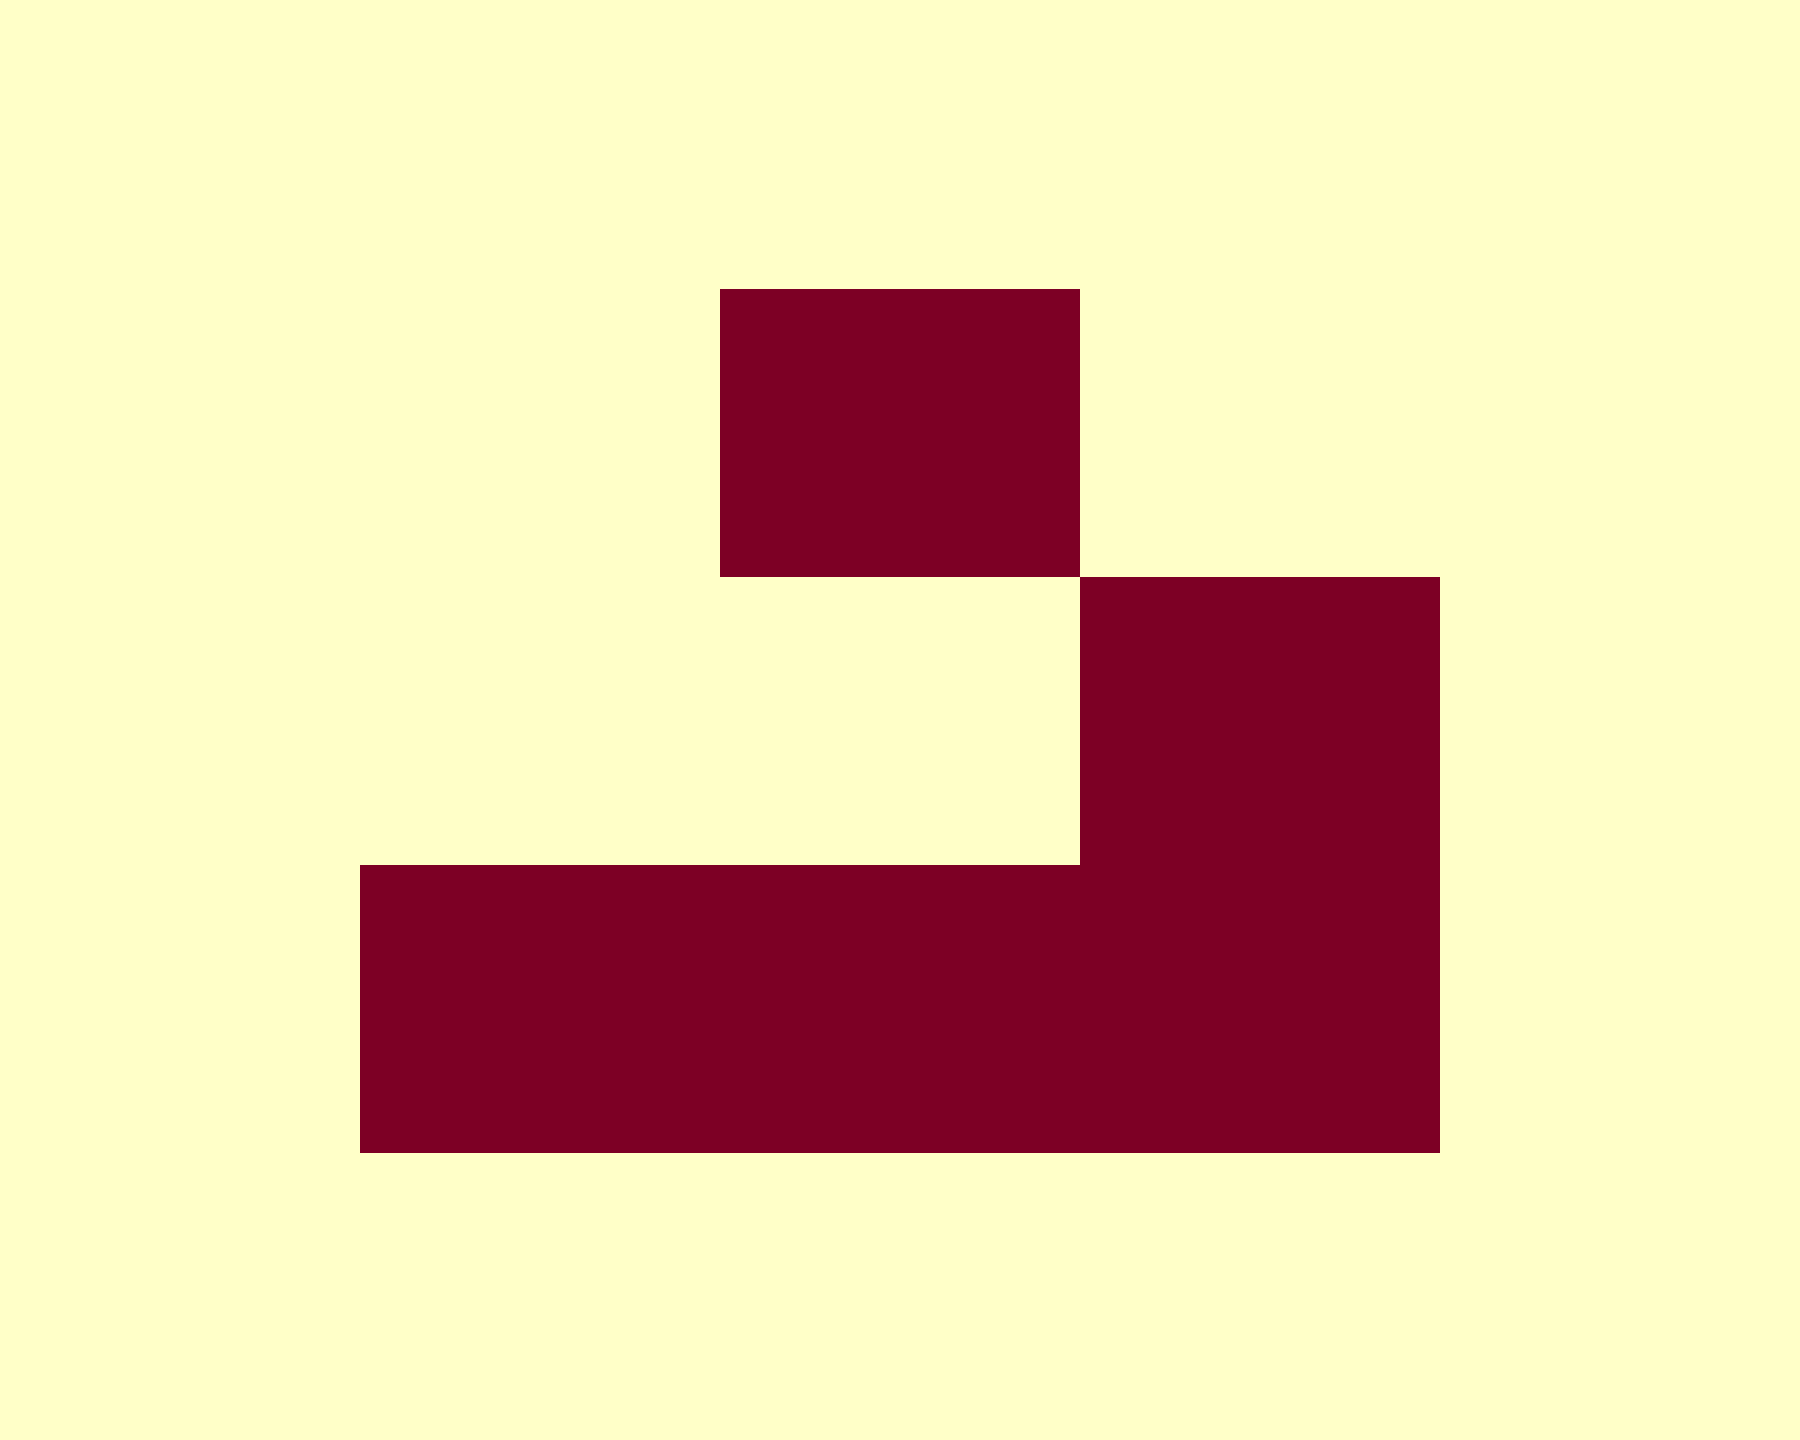

In [76]:
glider_v <- c(0,0,0,0,0, 0,0,1,0,0, 0,0,0,1,0, 0,1,1,1,0, 0,0,0,0,0)
glider_m <- matrix(glider_v, 5)           # convert to matrix
glider_m <- glider_m[, ncol(glider_m):1]  # reverse cols
par(mar = rep(0, 4))                      # ensure no margins
image(glider_m)     

In [80]:
11.5/14*60

[1] 49.28571